### 0. Sample loading

FP	S0	S0,V1	S0,V1,V2	S0,V2	V1	V1,V2	V2	
99	562	16	1	17	1298	9	3404	
FP RATIO : {}	PARENT RATIO : {}	
조정 후  FP 개수 : 0	PARENT 개수 : 42	CHILD_SPACE 개수 : 158	CHILD_AXIS 개수 : 0


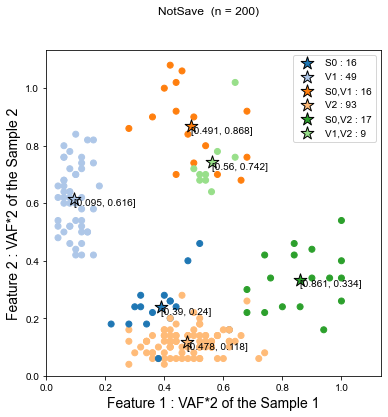

In [186]:
import filetype, datapreparationold, datapreparation220712, comb, extract, scoring, boundaryclone, graph, phylogeny, scoring, result, isparent, fppick, os
import pyclonesim, pyclonevisim, sciclonesim, datetime, time, subprocess
import EMhard, EMsoft
import visualizationsingle, visualizationpair, visualizationsinglesoft, visualizationpairsoft
import numpy as np
import pandas as pd
import scipy
from kneed import KneeLocator
pd.options.mode.chained_assignment = None


#2. MRS  ; Data preparation_new

# M1-3_M1-6 : FP가 굉장히 많다. FP의 신뢰도에 물음을 제기할수도...
# M1-3_M1-8 : original MRS.  pyclonevi, sciclone 모두  clone 합이 1이 되지 않는다
# M1-5_M1-8 : S0, V1, V2 이고 가장 쉬운 문제
# M1-5_M1-6 : Parent를 넣어줄 때 ML로 하는 게 좋은 예.  pyclone이 기가 막히가 잘 맞힘. 피해야 함
# M2-2_M2-12 : 
# M3-1_M3-16 : 잘 맞히긴 하는데 soft clustering이 약점을 보임. 피해야 함.
# M3-1_M3-14 : 쉬운 문제.  나도 잘하지만 Pyclone이 너무 잘함.

INPUT_TSV="/data/project/Alzheimer/EM_cluster/EM_input/MRS_2_sample/M1-3_M1-8_input.txt"     # /data/project/Alzheimer/EM_cluster/EM_input/summary/MRS_2_sample.txt
INPUT_FILETYPE, NUM_BLOCK = filetype.main (INPUT_TSV)
kwargs = {"INPUT_TSV" : INPUT_TSV,  "NUM_BLOCK_INPUT": NUM_BLOCK, "NUM_BLOCK": NUM_BLOCK, "NUM_CLONE_TRIAL_START" : 2, "NUM_CLONE_TRIAL_END" : 6, "NUM_CLONE_FORCE" : 4, 
                "RANDOM_PICK":200, "AXIS_RATIO":0, "PARENT_RATIO": 0, "NUM_PARENT" : 3, "FP_RATIO":0, "FP_2D" : "False", "TRIAL_NO" : 10, "DEPTH_CUTOFF" : 100, "VERBOSE" : 1, "ELBOW_S" : 3 , "GAUSSIAN_SD" : 1, "MIN_CLUSTER_SIZE" : 2, "OUTLIER_STANDARD" : "looser",  "RANDOM_SEED" : 1, "KMEANS_CLUSTERNO" : 15}
NUM_MUTATION = kwargs["RANDOM_PICK"]
SAMPLENAME = INPUT_TSV.split("/")[-1].split(".")[0]     # 'M1-5_M1-8_input'
kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/" + SAMPLENAME
kwargs["MYEM_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/MyEM/" + SAMPLENAME
kwargs["SCICLONE_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/sciclone/" + SAMPLENAME 
kwargs["PYCLONE_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/pyclone/" + SAMPLENAME 
kwargs["PYCLONEVI_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/pyclone-vi/" + SAMPLENAME 
kwargs["COMBINED_OUTPUT_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/" + SAMPLENAME 

os.system ("mkdir -p " +  kwargs["NPVAF_DIR"])
os.system ("mkdir -p " +  kwargs["MYEM_DIR"])
os.system ("mkdir -p " +  kwargs["MYEM_DIR"] + "/trial")
os.system ("mkdir -p " + kwargs["SCICLONE_DIR"] )
os.system ("mkdir -p " + kwargs["PYCLONE_DIR"] )
os.system ("mkdir -p " + kwargs["PYCLONEVI_DIR"] )

inputdf, df, np_vaf, membership_answer, mixture_answer,  mutation_id, samplename_dict_input  = datapreparation220712.main(**kwargs)
if type(inputdf) != type(False):
    samplename_dict_input_rev = {v: k for k, v in samplename_dict_input.items()}
    visualizationsingle.drawfigure_2d (membership_answer, "NotSave", np_vaf, samplename_dict_input, "")


#3. Moore :  Data preparation_new 
# "/data/project/Alzheimer/EM_cluster/EM_input/Moore_2_sample/PD43851/colon_crypt/F5_G6_input.txt"       # 2차원 monolonal
# "/data/project/Alzheimer/EM_cluster/Moore_data/Donor/PD43851/stomach_gland/PD43851x_P52_STM_B10.txt"    # 1차원 monoclonal인데 biclonal로 계속 오류남.   soft clustering으로 바꾸고 나서 monoclonal로 줌
# "/data/project/Alzheimer/EM_cluster/Moore_data/Donor/PD43851/oesophagus_epithelium/PD43851k_P52_OSPHG_E12.txt"  # 1차원 binclonal
# "/data/project/Alzheimer/EM_cluster/Moore_data/Donor/PD43851/oesophagus_epithelium/PD43851k_P53_OSPHG_B2.txt"  # 1차원  biclonal이 맞는 듯.  soft clustering에서도 biclonal로 줌
# "/data/project/Alzheimer/EM_cluster/EM_input/Moore_2_sample/PD28690/visceral_fat/L3_L4_input.txt"      # 2차원 monoclonal.  soft clustering으로 바꾸고 해결함
#  "/data/project/Alzheimer/EM_cluster/Moore_data/Donor/PD28690/oesophagus_epithelium/PD28690bl_OES2_CU2.txt"      # 1차원 polyclonal.  soft clustering + max로 해야 답을 4로 줌
# INPUT_TSV="/data/project/Alzheimer/EM_cluster/EM_input/Moore_2_sample/PD28690/visceral_fat/L3_L4_input.txt"
# INPUT_FILETYPE, NUM_BLOCK = filetype.main (INPUT_TSV)
# kwargs = {"INPUT_TSV" : INPUT_TSV,  "NUM_BLOCK_INPUT": NUM_BLOCK, "NUM_BLOCK": NUM_BLOCK, "NUM_CLONE_TRIAL_START" : 1, "NUM_CLONE_TRIAL_END" : 3, "NUM_CLONE_FORCE" : 1,
#                 "RANDOM_PICK":100, "AXIS_RATIO":0, "PARENT_RATIO": 0, "FP_RATIO":0, "FP_2D" : "False", "TRIAL_NO" : 5, "DEPTH_CUTOFF" : 5, "VERBOSE" : 0, "ELBOW_S" : 3 , "GAUSSIAN_SD" : 1, "MIN_CLUSTER_SIZE" : 5, "NUM_PARENT" : 0, "RANDOM_SEED" : 1, "KMEANS_CLUSTERNO" : 15}
# NUM_MUTATION = kwargs["RANDOM_PICK"]
# OUTPUT_DIR = "/data/project/Alzheimer/EM_cluster/Moore_data/Donor/YSChung/Moore_1_sample/" + kwargs["INPUT_TSV"].split("/")[-2] + "/" + kwargs["INPUT_TSV"].split("/")[-1].replace(".txt", "")
# kwargs["SCICLONE_DIR"], kwargs["PYCLONE_DIR"], kwargs["PYCLONEVI_DIR"] = OUTPUT_DIR, OUTPUT_DIR, OUTPUT_DIR
# SAMPLENAME = INPUT_TSV.split("/")[-1].split(".")[0] 
# kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/" + SAMPLENAME
# kwargs["MYEM_DIR"] = "/data/project/Alzheimer/YSscript/EM_MRS/data/MyEM/" + SAMPLENAME

# inputdf, df, np_vaf, membership_answer, mixture_answer,  mutation_id, samplename_dict  = datapreparation220712.main(**kwargs)
# membership_answer = [0] * kwargs["RANDOM_PICK"]
# samplename_dict = {0 : 0}

# if kwargs["NUM_BLOCK"] >= 2:         # 2차원이라면 정답 그림 그려준다
#     visualizationsingle.drawfigure_2d (membership_answer, "./output/0." + str(kwargs["INPUT_TSV"].split("/")[-2:]) + ".jpg", np_vaf, samplename_dict, "")


### 1. VAF densitogram 미리 확인 (NUM_BLOCK 개수만큼)

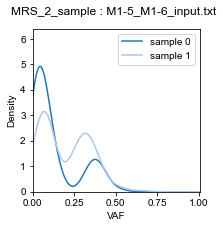

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
import palettable
tabl = palettable.tableau.Tableau_20.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors
colorlist = [i for i in tabl]
plt.figure (figsize = (3,3))
try:
    plt.suptitle ("{0}".format(' : '. join(kwargs["INPUT_TSV"].split("/")[-2:])))
except:
    plt.suptitle ("MRS dataset")
plt.xlabel ("VAF")
plt.ylabel ("Density")
max_y = 0

for i in range(kwargs["NUM_BLOCK"]):
    np_vaf[:,i]
    x = np.linspace(0,1,101)
    kde_np_vaf_new = kde.gaussian_kde(np_vaf[:,i])
    y = kde_np_vaf_new(x)
    if max_y < np.max(y):
        max_y = np.max(y)
    plt.plot(x, y, color = colorlist[i], label = "sample {0}".format(i))

plt.axis ([0,  1.01,  0,  max_y * 1.3])
plt.legend()

plt.savefig(kwargs["MYEM_DIR"]+ "/1.vafdensitogram.jpg")


### 2. Hard clustering으로 모든 clone을 다 뽑아보기

gap+normal 	VERBOSE= 1


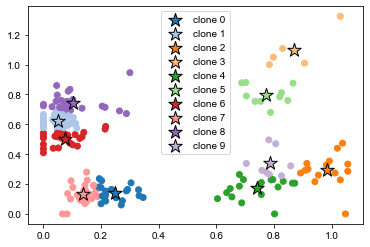

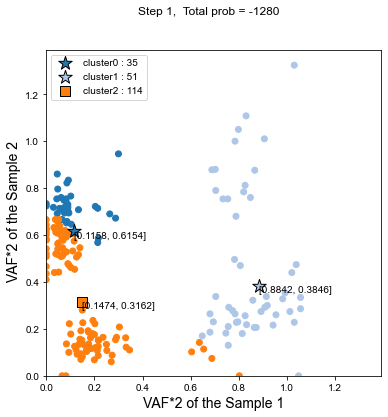

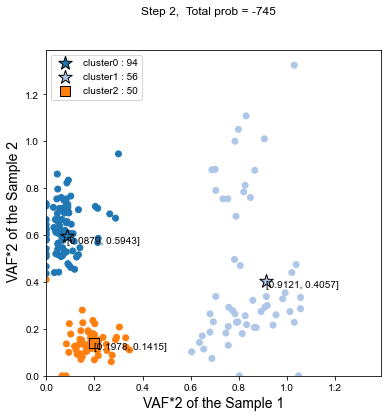

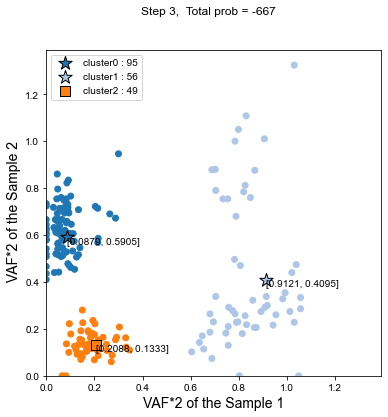

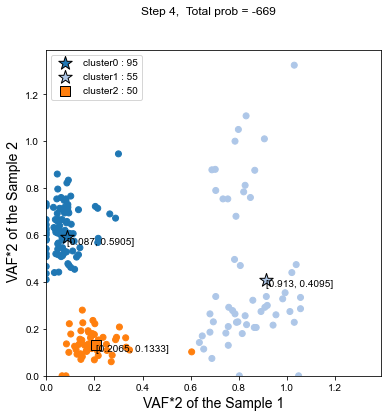

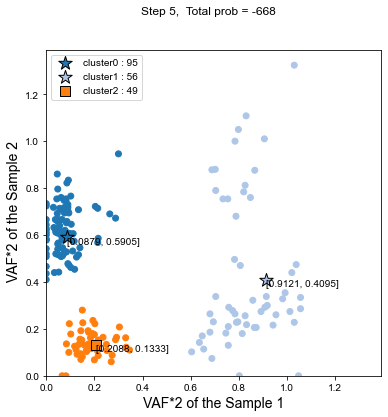

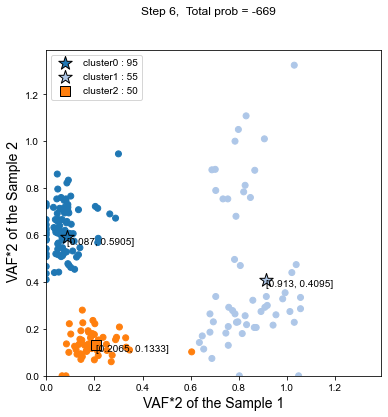

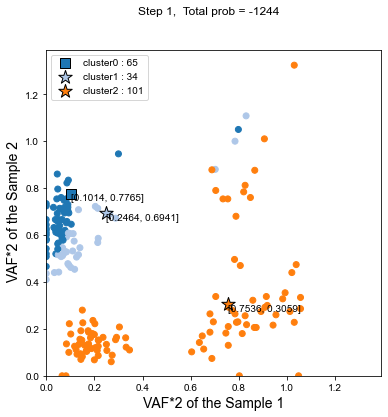

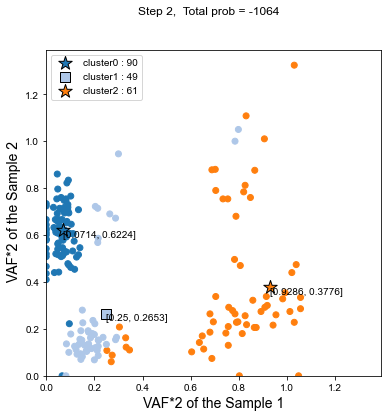

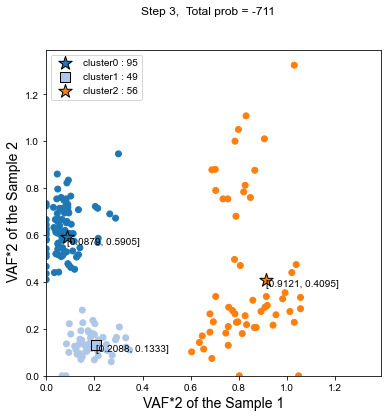

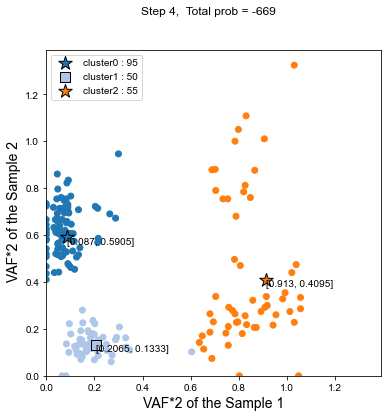

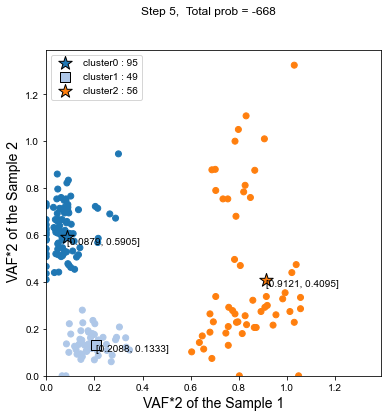

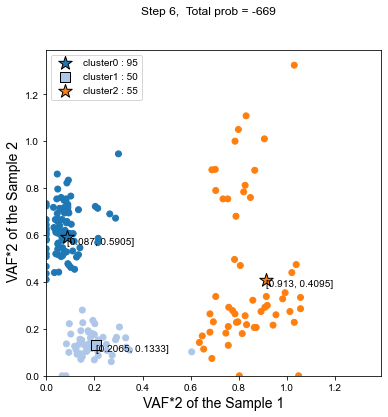

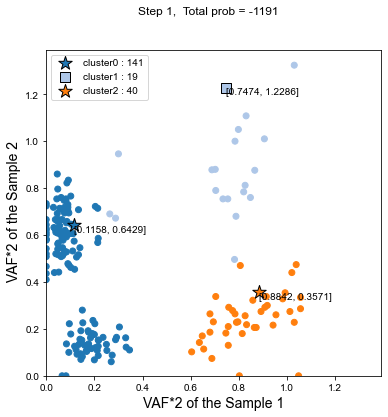

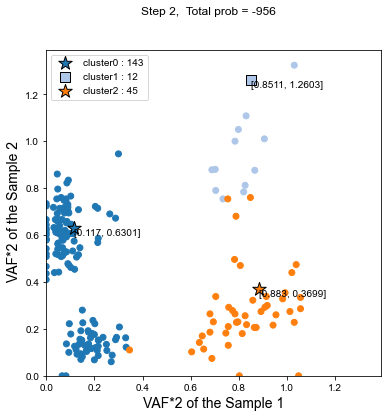

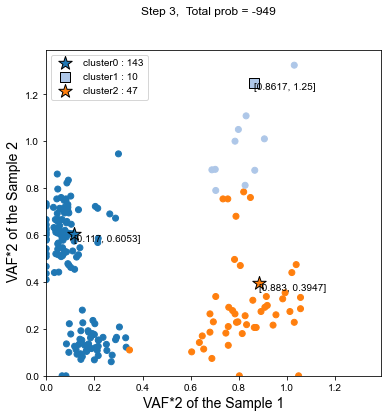

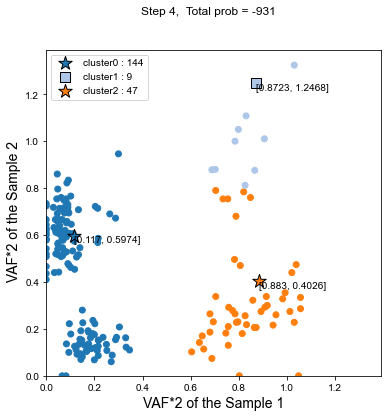

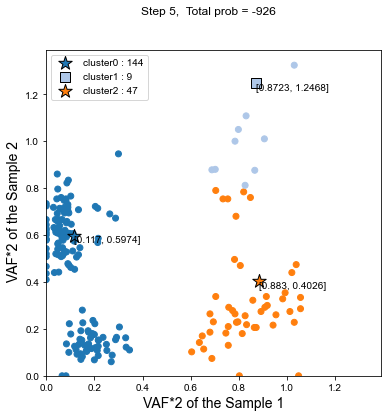

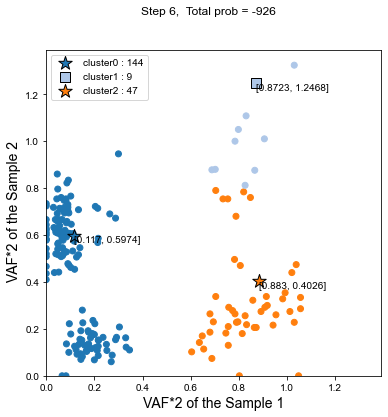

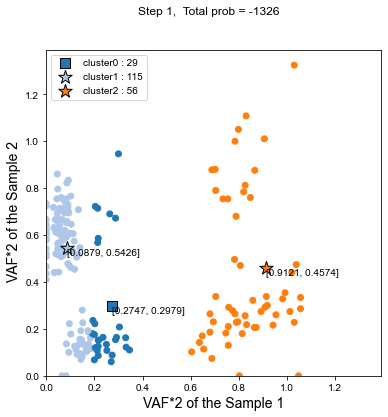

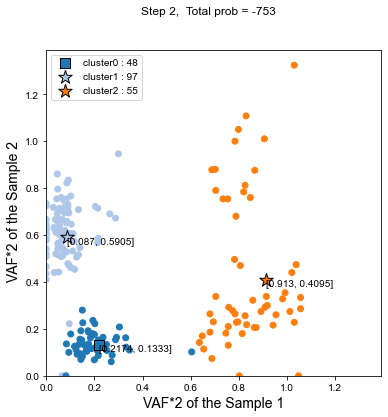

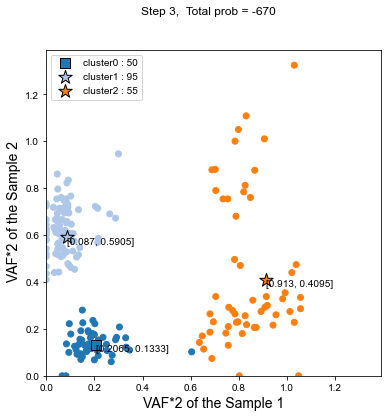

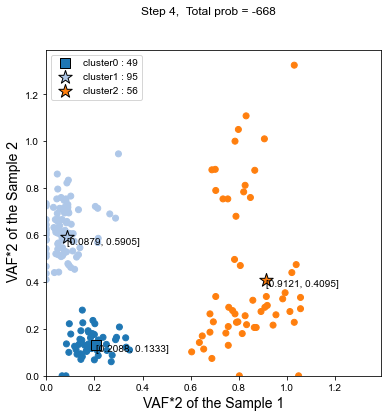

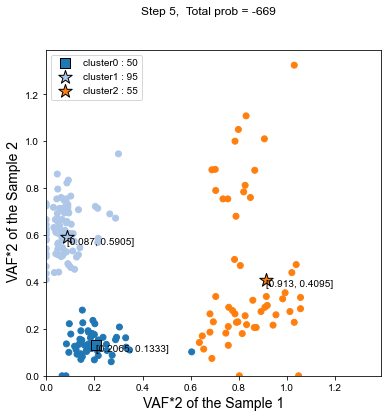

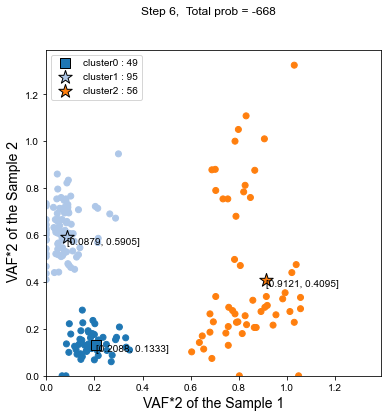

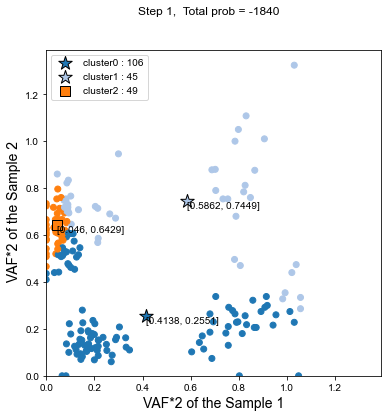

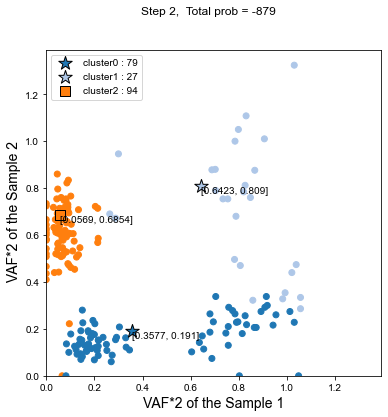

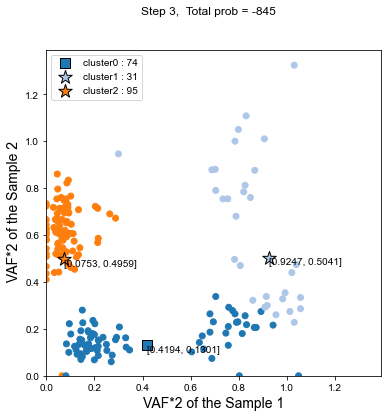

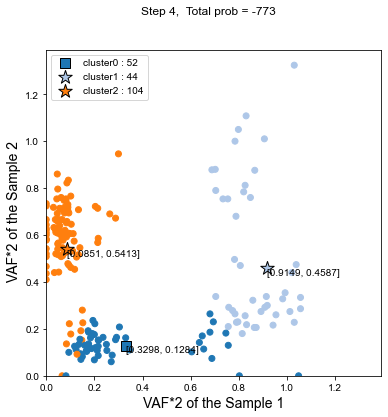

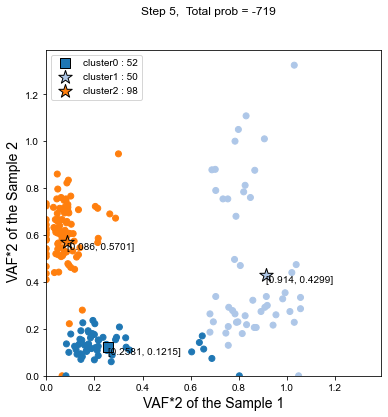

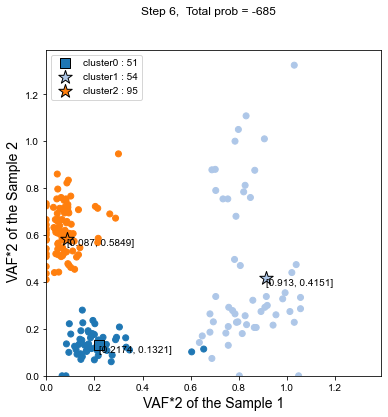

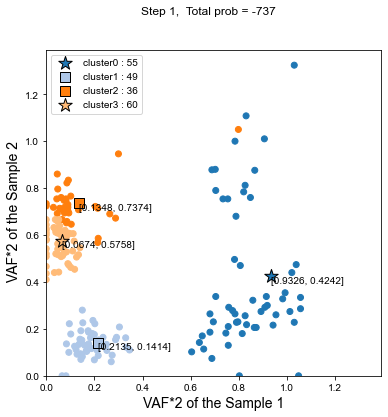

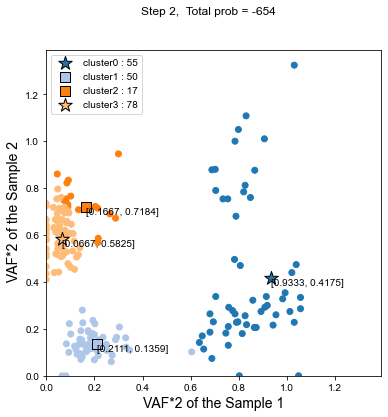

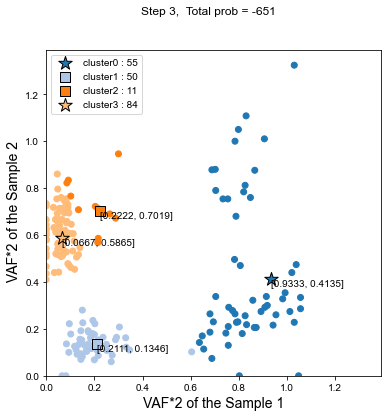

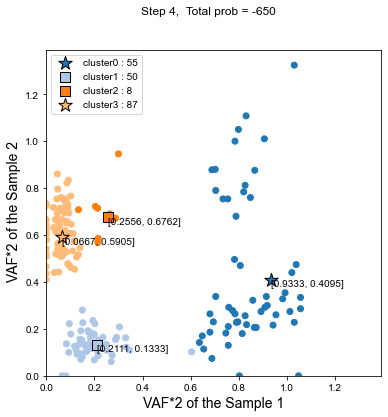

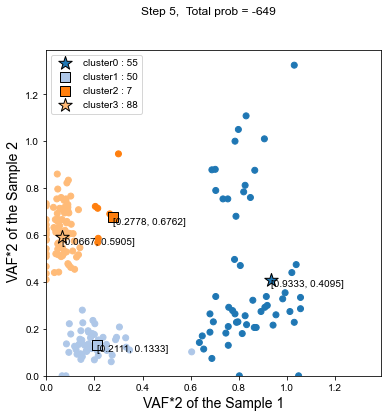

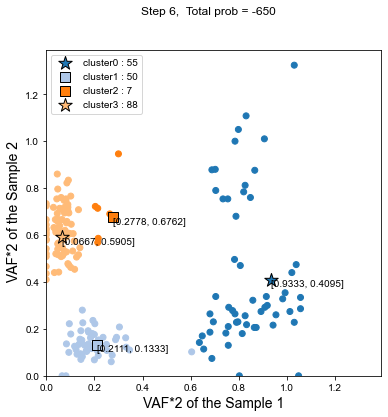

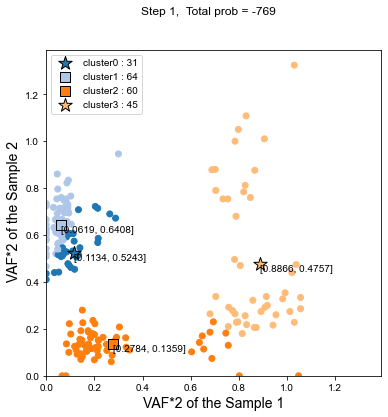

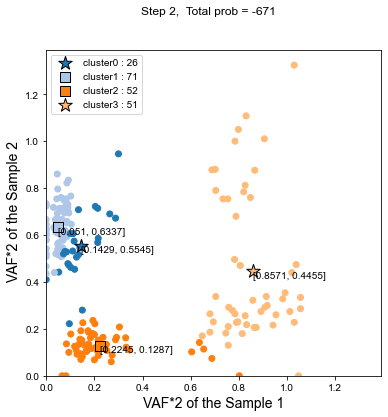

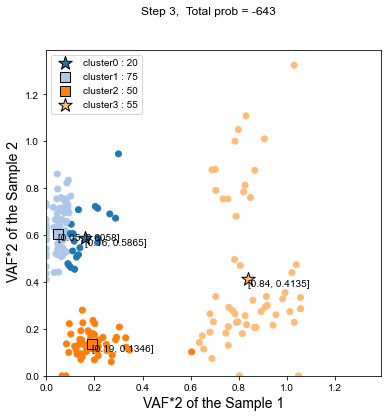

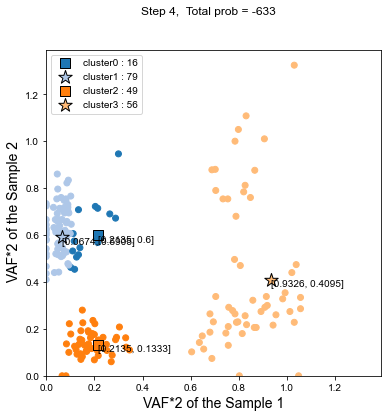

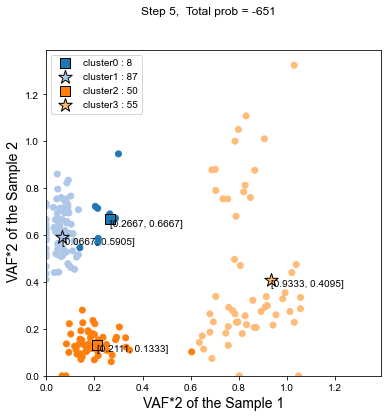

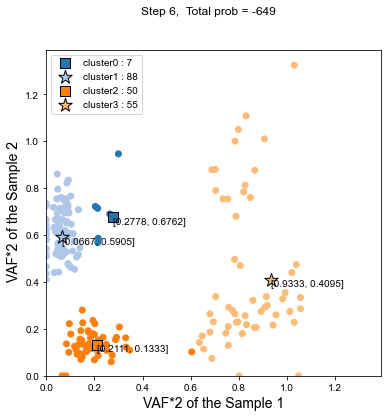

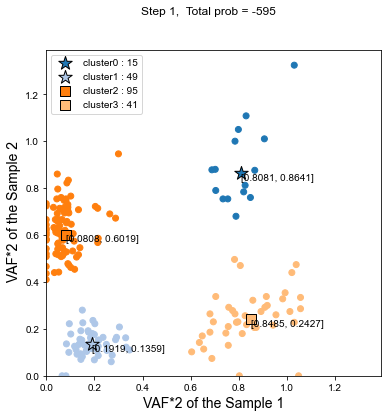

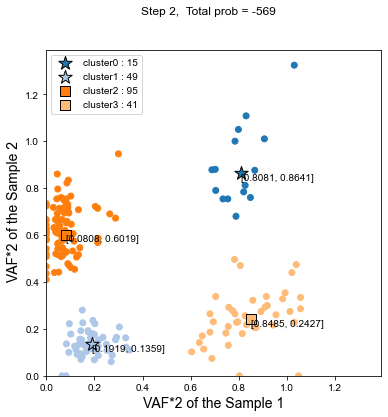

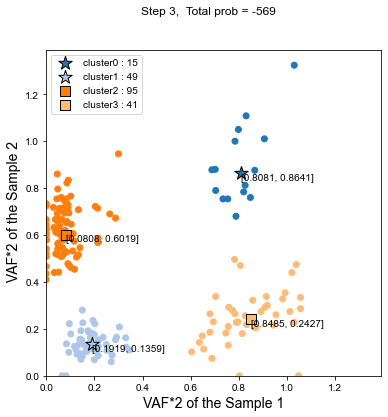

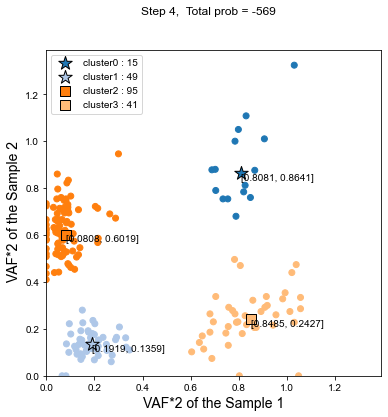

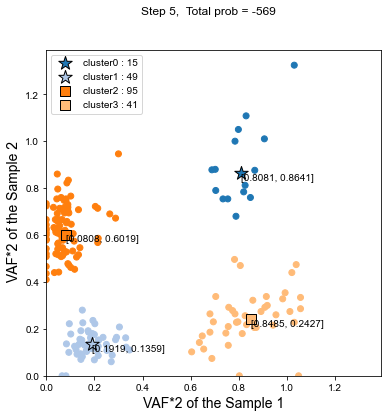

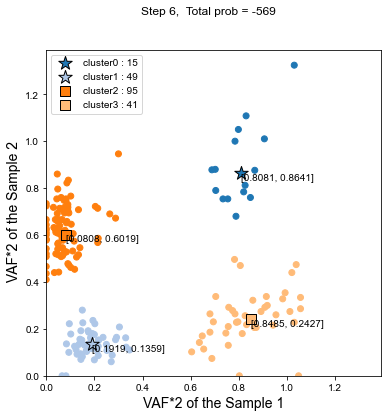

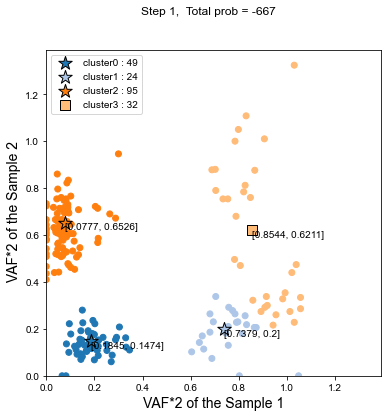

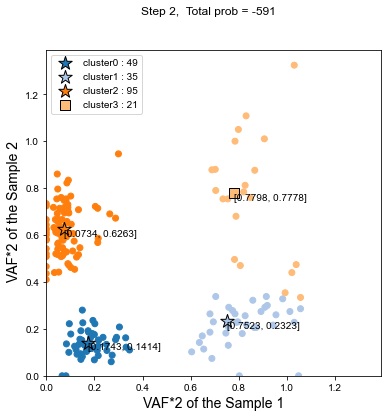

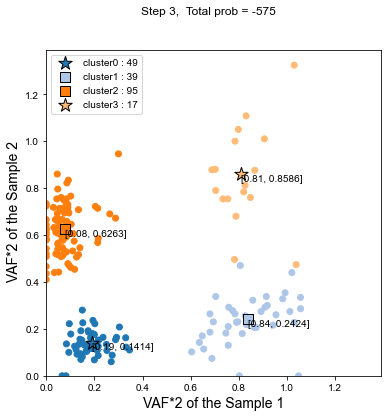

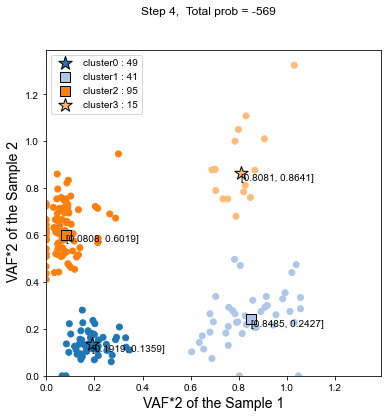

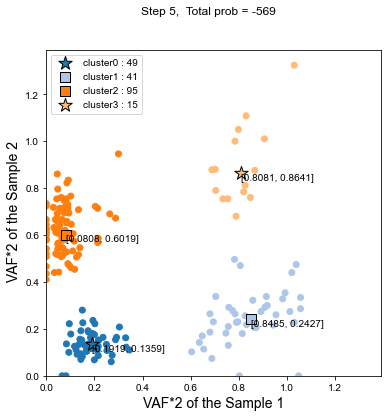

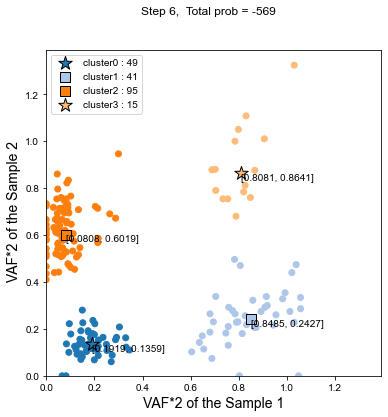

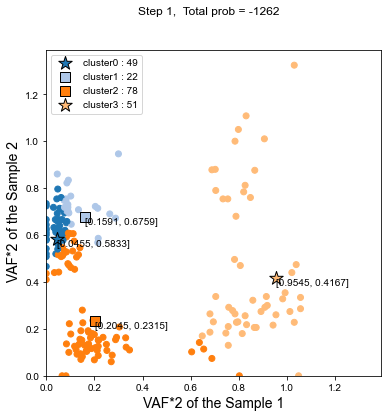

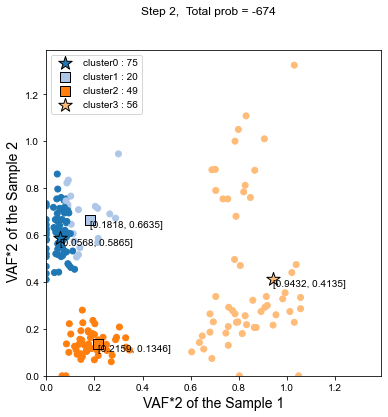

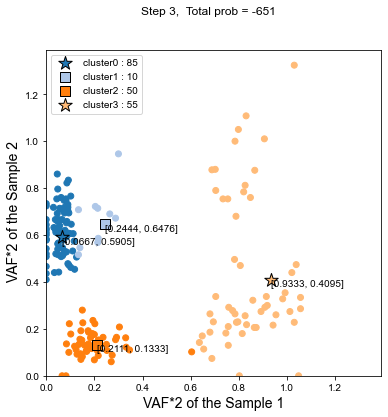

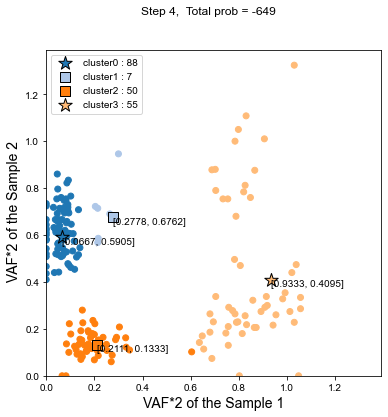

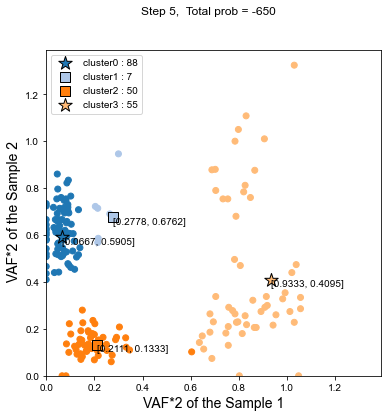

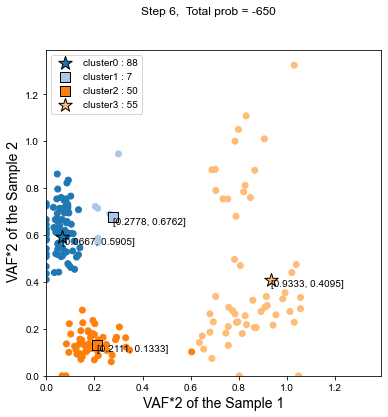

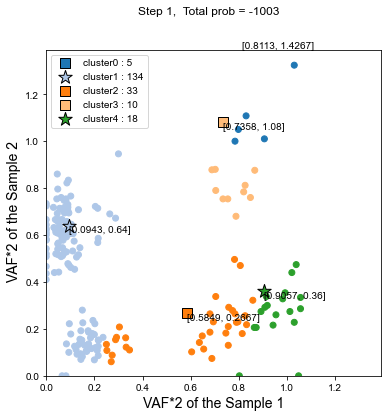

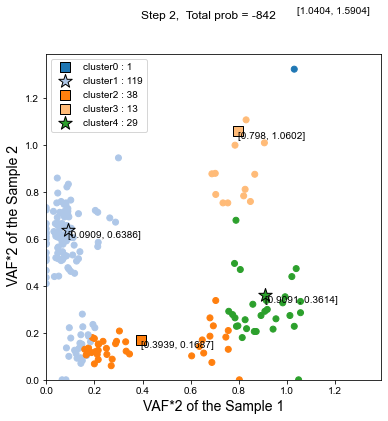

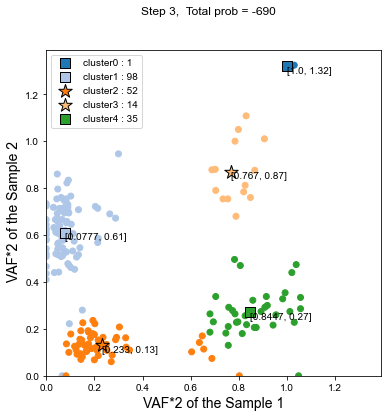

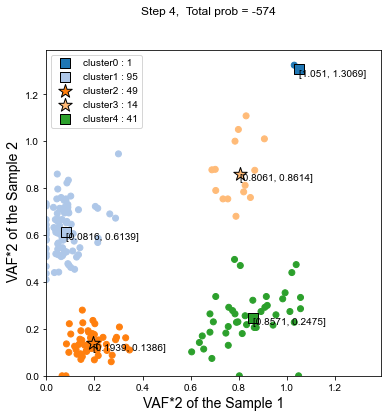

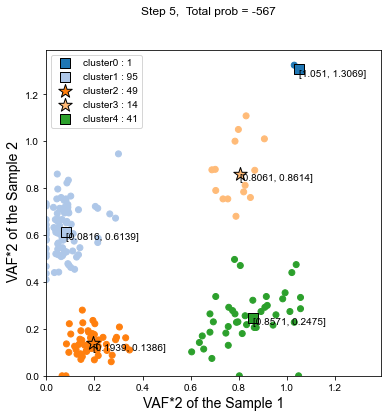

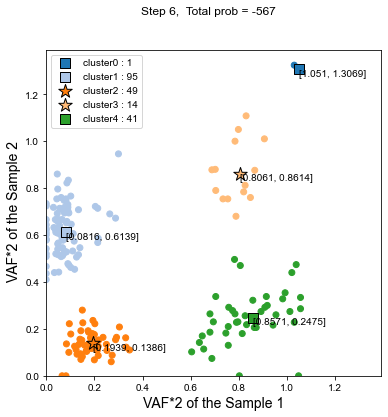

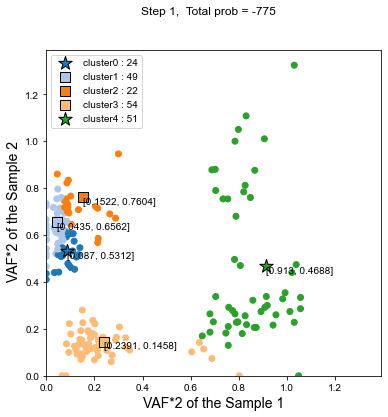

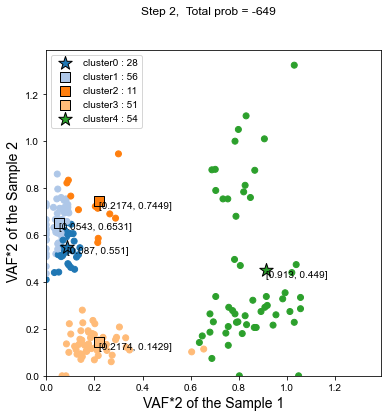

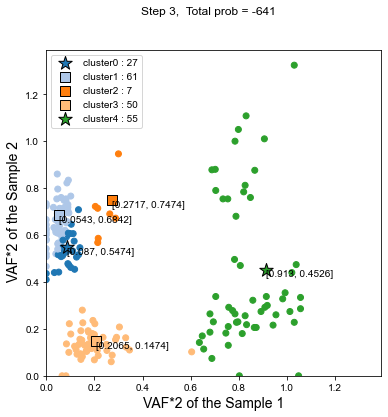

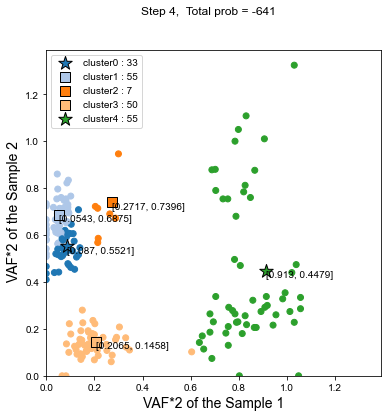

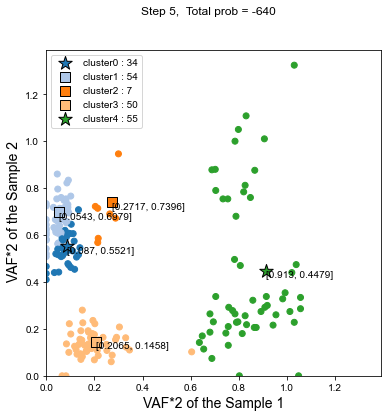

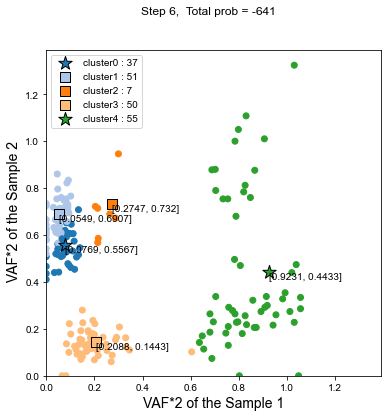

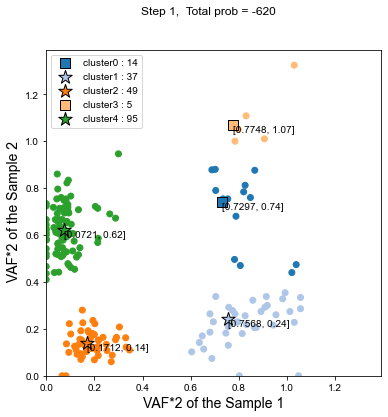

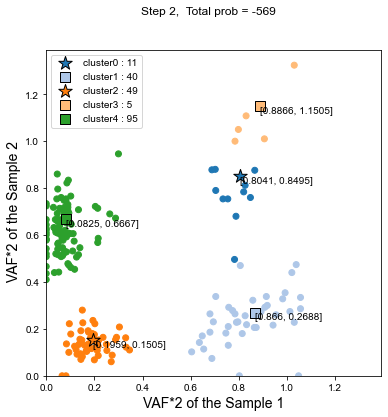

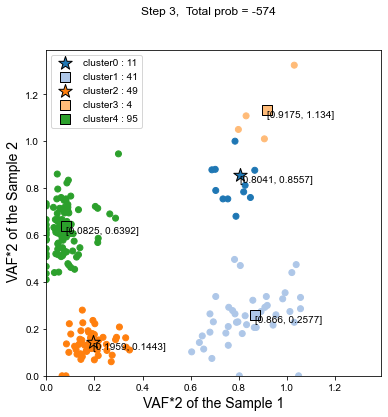

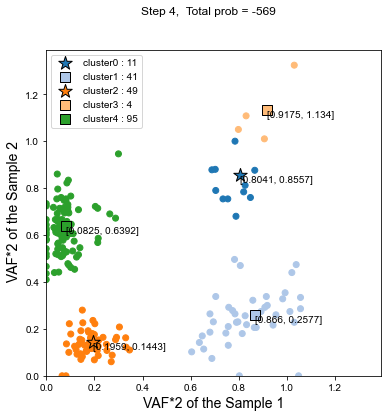

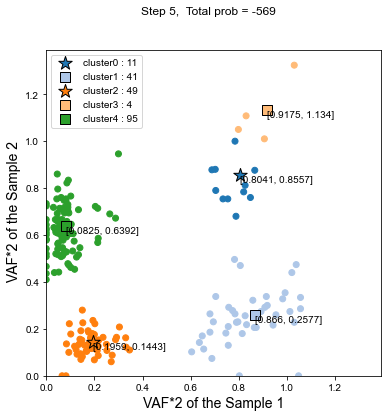

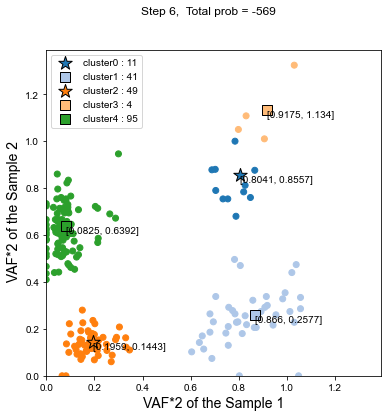

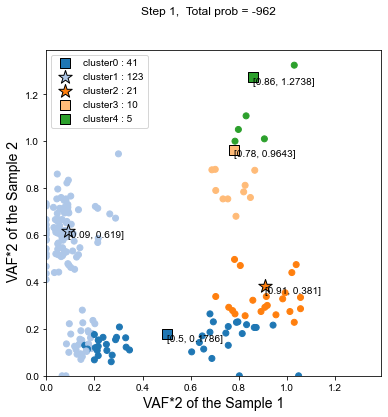

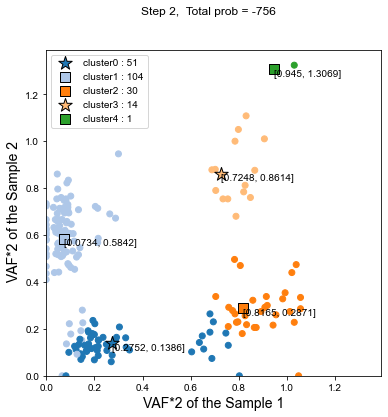

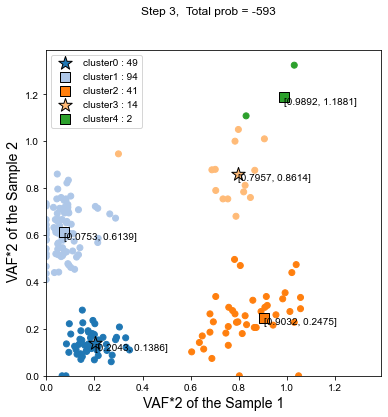

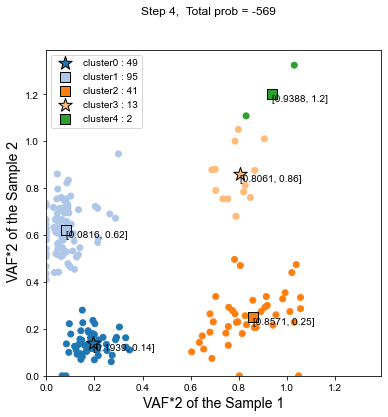

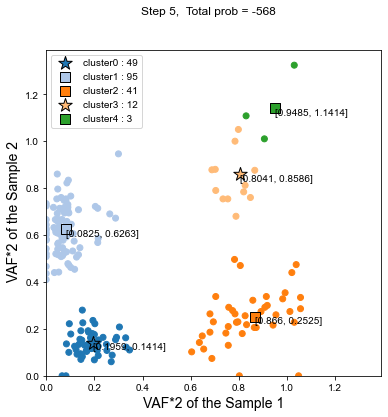

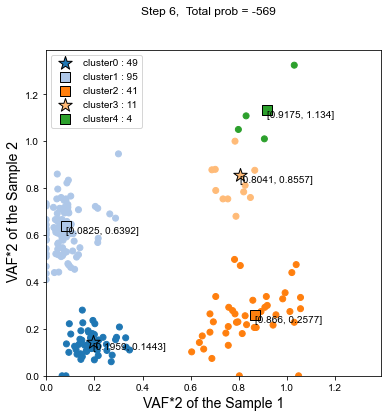

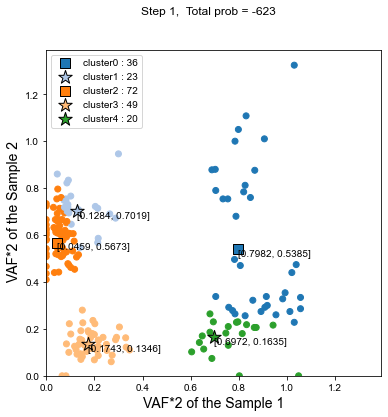

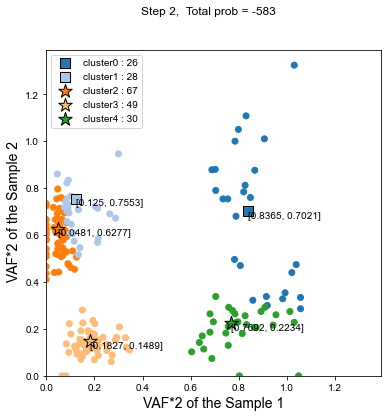

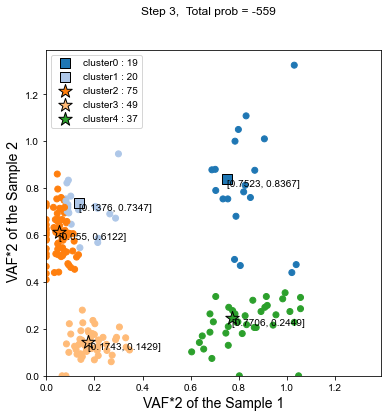

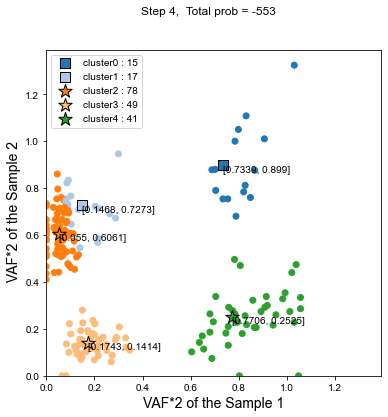

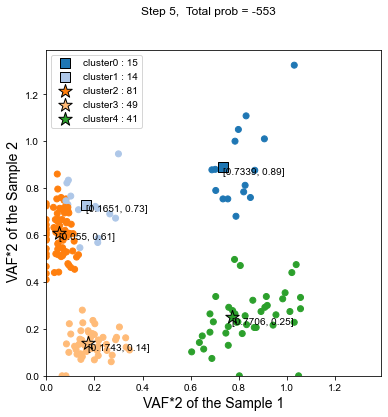

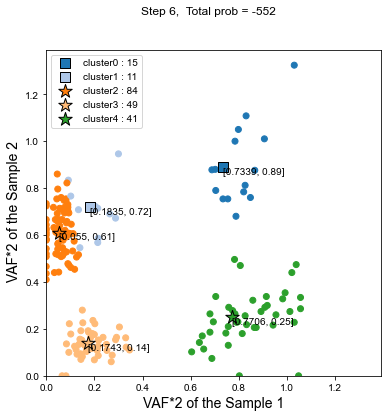

In [185]:
from collections import Counter
import scipy as sp
import scipy.stats
from scipy.special import beta, gamma
import math
import numpy as np
import pandas as pd
import random
from kneed import KneeLocator
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import EMsoft, isparent, visualizationsingle, palettable
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter (action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore")




def adjustmentfalse (np_vaf, KMEANS_CLUSTERNO):
    from sklearn.cluster import KMeans
    tabl = palettable.tableau.Tableau_20.mpl_colors
    colorlist = [i for i in tabl]

    #KMEANS_CLUSTERNO = 10
    kmeans = KMeans(n_clusters=KMEANS_CLUSTERNO, init='k-means++', max_iter=100,random_state=0)  # model 생성
    kmeans.fit(np_vaf)  # model에 집어넣어줄 dataframe 지정
    membership_kmeans = kmeans.labels_     # K means가 predict 한것

    plt.scatter (np_vaf[:,0] * 2, np_vaf[:,1] * 2, alpha = 1 , color = [colorlist[k] for k in membership_kmeans])

    mixture_kmeans = np.zeros (( NUM_BLOCK, KMEANS_CLUSTERNO), dtype = "float")
    for j in range(KMEANS_CLUSTERNO):
        for i in range (NUM_BLOCK):
            mixture_kmeans[i][j] = round(np.mean(np_vaf[membership_kmeans == (j)][:,i] * 2), 3)
        plt.scatter (mixture_kmeans[0][j], mixture_kmeans[1][j], marker = '*', color = colorlist[j], edgecolor = "black", s = 200, label = "clone " + str(j))

    plt.legend()
    
    return mixture_kmeans



def set_initial_parameter(df, trial, adjustment):
    global NUM_BLOCK, NUM_CLONE, NUM_MUTATION, VERBOSE, maxmax_mixture, initial_parameter_k_candidate

    initial_mixture = np.zeros((NUM_BLOCK, NUM_CLONE), dtype="float")

    if adjustment in ["True", "T"]:
        while True:
            for i in range(NUM_BLOCK):
                li = list(range(NUM_CLONE))   # 분율이 0인 경우도 포함
                choiceLIst = Counter([random.choice(li) for i in range(10)])

                for j in range(NUM_CLONE):
                    initial_mixture[i][j] = choiceLIst[j] / 10

            break
            # if 0 not in initial_mixture:   # 처음부터 분율이 0인게 있으면 다시 돌려라
            #     break
    else:
        # for j, k in enumerate(random.sample(range(NUM_MUTATION), NUM_CLONE)):
            # for i in range(NUM_BLOCK):
            #     initial_mixture[i][j] = round(int(df[k][i]["alt"]) / int(df[k][i]["depth"]) * 2, 2)
        initial_mixture = mixture_kmeans [:, random.sample (range(KMEANS_CLUSTERNO), NUM_CLONE)]

    #print ("1.maxmax_mixture : {0}".format(maxmax_mixture))

    if (VERBOSE in ["True", "T"]) | (int(str(VERBOSE)) >= 2):
        print("\nINITIAL : trial " + str(trial + 1))
        for i in range(NUM_BLOCK):
            print("\t{0}".format(initial_mixture[i]))

    return initial_mixture



def calc_likelihood(mixture, df,  k, VERBOSE):
    NUM_BLOCK = mixture.shape[0]
    NUM_CLONE = mixture.shape[1]
    NUM_MUTATION = len(df)

    max_prob = -99999
    max_clone = -1

    for j in range(NUM_CLONE):
        prob = 0
        prob2 = 0
        for i in range(NUM_BLOCK):
            depth_calc = int(df[k][i]["depth"] * mixture[i][j])
            alt_calc = int(df[k][i]["depth"] * mixture[i][j] * 0.5)
            depth_obs = int(df[k][i]["depth"])
            alt_obs = int(df[k][i]["alt"])

            # Binomial probability
            # if depth_calc >= alt_obs:
            #     try:
            #         prob = prob + math.log10(scipy.stats.binom.pmf (n = depth_calc,k = alt_obs, p = 0.5))            # 이렇게 하면 안되고 beta binomial로 계산해야 함  ( Beta  (alt_expected, depth - alt_expected , vaf_observed))
            #     except:
            #         prob = prob - 400
            #     #math.log10(sys.float_info.min*sys.float_info.epsilon)
            # else :
            #     prob = prob +  math.log10(SEQ_ERROR) * (alt_obs-depth_calc)

            # # Beta binomial distribution
            a = df[k][i]["depth"] * mixture[i][j] * 0.5              # alt_expected
            b = depth_obs - a            # ref_expected
            try:
                prob = prob + math.log10(scipy.stats.betabinom.pmf(alt_obs, depth_obs, a+1, b+1))
            except:
                prob = prob - 400

            # print("{0}번째 mutation : {1} 번째 clone, {2}번째 block → alt_expected : {3},  alt_observed : {4}, depth_observed : {5}, likelihood : {6}"
            #           .format(k, j, i, round(a, 1), alt_obs, depth_obs,  scipy.stats.betabinom.pmf(alt_obs, depth_obs, a+1, b+1)))

        if prob > max_prob:
            max_prob = prob
            max_prob_clone_candidate = [j]
        elif prob == max_prob:
            max_prob_clone_candidate.append(j)

    max_clone = random.choice(max_prob_clone_candidate)

    # print("mutation_{0} : {1}번 clone이 가장 적절 (log p = {2})\n".format(k, max_clone, max_prob))
    return max_clone, max_prob


def Estep(mixture, df, VERBOSE = 0):  # MEMBERSHIP 정하는 과정
    NUM_BLOCK = mixture.shape[0]
    NUM_CLONE = mixture.shape[1]
    NUM_MUTATION = len(df)

    global  step_prob_list

    total_prob = 0
    step_prob_list = np.zeros(NUM_MUTATION, dtype="float64")  # 마치 soft clustring의 membership_p같은 느낌
    membership = np.zeros(NUM_MUTATION, dtype="int32")

    for k in range(NUM_MUTATION):
        # k번째 mutation은 membership을 누구에게 주는 게 좋을까?
        j, max_prob = calc_likelihood(mixture, df,  k, VERBOSE)
        membership[k], step_prob_list[k] = j, max_prob
        total_prob = total_prob + max_prob

     #print("\tTotal likelihood : {0}".format(round(total_prob, 2)))

    return round(total_prob, 2), membership


# Block 1, 2:  data point를 2차원 평면상에 그려보기
def drawfigure_2d(membership, mixture, makeone_index, output_filename, np_vaf, samplename_dict, step, total_prob, includeoutlier, dimensionreduction="None"):
    import palettable
    import matplotlib
    import seaborn as sns
    vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    bdo = palettable.lightbartlein.diverging.BlueDarkOrange18_18.mpl_colors
    tabl = palettable.tableau.Tableau_20.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors
    colorlist = [i for i in tabl]
    
    font_dir = "/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/"
    font_dirs = matplotlib.font_manager.findSystemFonts(fontpaths=font_dir, fontext='ttf')
    for font in font_dirs:
        matplotlib.font_manager.fontManager.addfont(font)
    #print (matplotlib.font_manager.FontProperties(fname = font).get_name())

    matplotlib.rcParams["font.family"] = 'arial'
    matplotlib.pyplot.figure(figsize=(6, 6))
    matplotlib.pyplot.axis([0,  np.max(np_vaf[:, :]) * 2.1, 0,  np.max(np_vaf[:, :]) * 2.1])
    matplotlib.pyplot.xlabel("VAF*2 of the Sample 1", fontdict = {"fontsize" : 14})
    matplotlib.pyplot.ylabel(" VAF*2 of the Sample 2", fontdict = {"fontsize" : 14})


    matplotlib.pyplot.suptitle("Step {},  Total prob = {}".format(step, round(total_prob)), fontsize = "large")

    if includeoutlier == "Yes":
        outlier_color_num = samplename_dict[np.max(list(samplename_dict.keys()))]       # 맨 마지막 번호의 색깔번호 (Outlier 번호)
        colorlist [ outlier_color_num ] = Gr_10[16]

    matplotlib.pyplot.scatter(np_vaf[:, 0] * 2, np_vaf[:, 1] * 2, color=[colorlist[samplename_dict[k]] for k in membership])

    for sample_index, sample in enumerate(samplename_dict):
        if sample not in set(membership):
            continue
        # # Outlier는 까만 사각형 칠하지도 말자
        # if includeoutlier == "Yes":
        #     if sample_index == len(list(samplename_dict)) - 1:
        #         continue

        # mixture 정보를 바탕으로
        x_mean = mixture[0][sample_index]
        y_mean = mixture[1][sample_index]
        matplotlib.pyplot.text(x_mean, y_mean, "{0}".format( [x_mean, y_mean]), verticalalignment='top')

        if sample_index in makeone_index:
            matplotlib.pyplot.scatter(x_mean, y_mean, marker='*', color=colorlist[sample_index], edgecolor='black', s=200, label="cluster" + str(sample_index) + " : " + str(list(membership).count(sample_index)))
        else:
            matplotlib.pyplot.scatter(x_mean, y_mean, marker='s', color=colorlist[sample_index], edgecolor='black', s=100, label="cluster" + str(sample_index) + " : " + str(list(membership).count(sample_index)))

        # membership & np_vaf 정보를 바탕으로
        # x_mean = round(np.mean(np_vaf[[x for x in range( len(membership)) if membership[x] == sample]][:, 0] * 2), 3)
        # y_mean = round(np.mean(np_vaf[[x for x in range( len(membership)) if membership[x] == sample]][:, 1] * 2), 3)
        # matplotlib.pyplot.text(x_mean, y_mean, "{0}".format([x_mean, y_mean]), verticalalignment='top')
        # matplotlib.pyplot.scatter(x_mean, y_mean, marker='*', color=colorlist[samplename_dict[sample]], edgecolor='black', s=180, label=str(sample) + " : " + str(list(membership).count(sample)))
        matplotlib.pyplot.legend()

    if output_filename != "NotSave":
        matplotlib.pyplot.savefig(output_filename)



def Mstep(membership, df, NUM_CLONE, adjustment, option,  step,  total_prob, **kwargs):  # 새로운 MIXTURE 정하는 과정
    VERBOSE = kwargs["VERBOSE"]
    NUM_BLOCK = kwargs["NUM_BLOCK"]
    NUM_MUTATION = kwargs["RANDOM_PICK"]

    mixture = np.zeros((NUM_BLOCK, NUM_CLONE), dtype='float')  # mixture 값을 일단 초기화
    makeone_index = []

    if option in ["Hard", "hard"]:
        ############################### HARD CLUSTERING ##############################
        for j in range(NUM_CLONE):
            ind_list = []          # membership == j 인 index를 구하기
            for k in range(NUM_MUTATION):
                if membership[k] == j:
                    ind_list.append(k)

            for i in range(NUM_BLOCK):
                sum_depth, sum_alt = 0, 0
                for ind in ind_list:       # depth, alt를 다 더하기
                    sum_depth = sum_depth + df[ind][i]["depth"]
                    sum_alt = sum_alt + df[ind][i]["alt"]

                #print (i, j, sum_depth, sum_alt)
                if sum_depth == 0:      # i번째 block에서 j번째 clone이 아예 없으면 0을 준다
                    mixture[i][j] = 0
                else:                   # j번째 clone만을 생각한 이상적인 분율을 일단 assign
                    mixture[i][j] = round((sum_alt * 2) / sum_depth, 2)

        
        # Block당 Mixture의 합이 1이 되도록 재조정
        if type(adjustment) == type([]):     # child clone만 합쳐서 1
            for i in range(NUM_BLOCK):
                sum = 0
                for j in range(NUM_CLONE):
                    if j in adjustment:
                        sum = sum + mixture[i][j]
                # 만약 sum이 0이면 분모에 0이 들어갈 수 있으니까...
                mixture[i] = np.round(mixture[i] / sum, 4) if sum != 0 else 0
        else:     # 모두 합쳐서 1이 되게 하라
            if adjustment in ["True", "true", True]:
                for i in range(NUM_BLOCK):
                    sum = 0
                    for j in range(NUM_CLONE):
                        sum = sum + mixture[i][j]
                    # 만약 sum이 0이면 분모에 0이 들어갈 수 있으니까...
                    mixture[i] = np.round(mixture[i] / sum, 4) if sum != 0 else 0

            elif adjustment in ["Half", "half"]:
                if step <= 20:
                    makeone_index, p_list = isparent.makeone (membership, mixture, "False", **kwargs)  # 아직 outlier를 계산하는 단계는 아니니까 outlier clone은 없다
                    if makeone_index == None:
                        if NUM_CLONE == 1:
                            mixture = np.array ( [ [1.0],[1.0] ] )
                        else:
                            print ("뭔가 이상하다. 왜 합쳐서 1을 못만들지?", mixture)
                        return mixture, makeone_index
                    for i in range(NUM_BLOCK):
                        sum = 0
                        for j in range(NUM_CLONE):
                            if j in makeone_index:                # 1과 가장 가까운 clone들만 붙잡아줌
                                sum = sum + mixture[i][j]
                        # 만약 sum이 0이면 분모에 0이 들어갈 수 있으니까...
                        mixture[i] = np.round(mixture[i] / sum, 4) if sum != 0 else 0

        if (kwargs["VERBOSE"] in ["True", "T"]) | (int(str(kwargs["VERBOSE"])) >= 1):
            #print("Mixture (soft clustering after adjustment) : {}\n ". format(list(mixture)))
            samplename_dict = {k:k for k in range(0, np.max(membership)+ 1)}        
            drawfigure_2d (membership, mixture, makeone_index, kwargs["MYEM_DIR"] + "/trial/hard.clone." + str (NUM_CLONE) + ".trial" + str(trial) + ".step" + str(step) + ".jpg" , np_vaf, samplename_dict, step, total_prob, "False", "")
        

        # print("Mixture (hard clustering after adjustment) : {} ". format(list(mixture)))
    return mixture, makeone_index


def Sorting(membership, mixture):
    global NUM_CLONE, NUM_BLOCK, NUM_MUTATION

    # membership, mixture를 앞에 나오는 순서대로 numbering을 다시 해줌
    mixture_sort = np.zeros((NUM_BLOCK, NUM_CLONE), dtype='float')
    membership_sort = []
    dict = {}
    num = 0

    # membership을 정렬해서 보내줌
    for k in range(NUM_MUTATION):
        if membership[k] not in dict:
            membership_sort.append(num)
            dict[membership[k]] = num
            num = num + 1
        else:
            membership_sort.append(dict[membership[k]])
    membership_sort = np.array(membership_sort)

    # 그 순서대로 mixture도 정렬해서 보내줌
    for i in range(0, NUM_BLOCK):
        for j in range(0, NUM_CLONE):
            if j in dict:
                mixture_sort[i][dict[j]] = mixture[i][j]

    return membership_sort, mixture_sort


# 이전 membership과 겹치거나 likelihood가 나아질 기미가 보이지 않으면 stop
def GoStop(t, total_prob, membership, mixture, step):
    global NUM_BLOCK, RANDOM_PICK, NUM_MUTATION, NUM_CLONE, NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END, TRIAL_NO, VERBOSE
    global maxmaxmax_likelihood, maxmaxmax_membership, maxmaxmax_membership_p, maxmaxmax_NUM_CLONE, maxmaxmax_mixture, maxmax_likelihood, maxmax_membership, maxmax_membership_p, maxmax_mixture, max_likelihood, max_membership, max_membership_p, max_mixture, step_prob_list, max_prob_list
    global previous_No, previous_mixture, previous_membership, previous_likelihood

    # 방금 step에서 구한게 최적값을 경신했는지 판다
    if (total_prob > max_likelihood) & (step >= 1):
        max_likelihood = total_prob
        max_membership = membership.view()        # 얕은사본
        max_mixture = mixture.view()                       # 얕은사본
        max_prob_list = step_prob_list.view()           # 얕은사본

    # 첫 5번 정도는 판단 유예
    if t > previous_No:
        for p in range(previous_No):       # 지난 5개의 membership을 보고 비교해본다
            #print (str(np.sum(np.equal(membership, previous_membership[p]))) + "점", end = "\t")
            # membership이 90% 이상 겹치면 stop 해주자
            if np.sum(np.equal(membership, previous_membership[p])) >= int(NUM_MUTATION * 0.9):
                #print ("\n\n지난 {0} 번째와 membership 변화가 없어서 stop : {1}개 겹침".format(p, np.sum(np.equal(membership, previous_membership[p]))))
                return "Stop"

        # likelihood가 더 나아질 기미가 없으면 stop 해주자
        if (total_prob) < 0.99 * np.max(previous_likelihood):
            #print ("\n\nLikelihood 기준으로 stop")
            return "Stop"

    # 차곡차곡 채워넣어준다
    previous_membership[t % previous_No] = membership
    previous_likelihood[t % previous_No] = total_prob
    previous_mixture[t % previous_No] = mixture

    return "Go"

def BetaBinomDist (k1, k2, df):
    NUM_BLOCK = len(df[0])
    prob  = 0
    for i in range (NUM_BLOCK):
        depth1, alt1 = df[k1][i]["depth"], df[k1][i]["alt"]
        depth2, alt2 = df[k2][i]["depth"], df[k2][i]["alt"]
        
        try:
            prob = prob + math.log10(scipy.stats.betabinom.pmf(alt1, depth1, alt2+1, depth2+1))
        except:
            prob = prob - 400
    return prob

def findnearestcluster (k1, np_vaf, membership, mixture, includeoutlier):
    NUM_CLONE = mixture.shape[1]
    dist = np.zeros ( NUM_CLONE, dtype = "float" )
    for j in range (mixture.shape[1] - int(includeoutlier == "True")):
        if j != membership[k1]:
            dist[j] = scipy.spatial.distance.euclidean(np_vaf[k1], mixture[:, j])
        else:
            dist[j] = float("inf")

    return np.argmin(dist)

def calculateSi (membership, mixture, df, np_vaf, includeoutlier):
    NUM_MUTATION = len(membership)
    NUM_CLONE = mixture.shape[1]

    np_si = np.zeros ( (NUM_MUTATION, 3), dtype = "float" )   # 0 : 본인  cluster si,  1: 가까운 cluster si,  2: 실루엣 계수

    for k1 in range (NUM_MUTATION):
        prob = []
        self_cluster_index = np.where ( np.array(membership) == membership[k1] )[0]
        for k2 in self_cluster_index:
            if k1 != k2:
                prob.append ( BetaBinomDist (k1, k2, df) )
        np_si[k1][0] = np.mean(np.array(prob))


        prob = []
        nearest_cluster = findnearestcluster(k1, np_vaf, membership, mixture, includeoutlier)
        nearest_cluster_index = np.where ( np.array(membership) == nearest_cluster )[0]    

        for k2 in nearest_cluster_index:
            if k1 != k2:
                prob.append ( BetaBinomDist (k1, k2, df) )
        np_si[k1][1] = np.mean(np.array(prob))

        np_si[k1][2] = abs( (np_si[k1][0] - np_si[k1][1]) / (np.min ( [np_si[k1][0], np_si[k1][1] ]))  )


    if includeoutlier == "True":
        non_outlier_index = np.where ( np.array(membership) != np.max(membership) )[0]
        sil = np.mean (np_si[non_outlier_index, 2])
    elif includeoutlier == "False":
        sil = np.mean (np_si[:, 2])

    for j in range (NUM_CLONE):
        clone_index = np.where ( np.array(membership) != j )[0]
        print ("clone {}의 평균 silhouette score : {}".format(j, np.mean(np_si[clone_index, 2])))

    
    # if math.isnan(sil) == True:
    #     print (np_si[0:5])
    #     print (np.unique(membership, return_counts=True))
    #     print (mixture)
    #     print ("includeoutlier : {}".format(includeoutlier))
        
    #     for k1 in range (NUM_MUTATION):
    #         prob = []
    #         nearest_cluster = findnearestcluster(k1, np_vaf, membership, mixture, includeoutlier)
    #         nearest_cluster_index = np.where ( np.array(membership) == nearest_cluster )[0]    
    #         for k2 in nearest_cluster_index:
    #             if k1 != k2:
    #                 prob.append ( BetaBinomDist (k1, k2, df) )

    #         #print ("{}의 nearest cluster : {}, nearest clustet index : {}".format (k1, nearest_cluster, nearest_cluster_index))

    
    return sil



###################### MAIN ##################################################################

kwargs["ELBOW_S"] = 1; kwargs["GAUSSIAN_SD"] = 2; kwargs["TRIAL_NO"] = 5; kwargs["NUM_CLONE_TRIAL_START"] = 3;  kwargs["NUM_CLONE_TRIAL_END"] = 5; kwargs["NUM_CLONE_TRIAL_FORCE"] = 4; kwargs["MIN_CLUSTER_SIZE"] = 15; kwargs["VERBOSE"] = 1; kwargs["OUTLIER_STANDARD"] = "looser"
method = "gap+normal"; adjustment = "Half";  kwargs["KMEANS_CLUSTERNO"] = 10

global NUM_BLOCK, RANDOM_PICK, NUM_MUTATION, NUM_CLONE, NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END,  NUM_CLONE_FORCE, TRIAL_NO, VERBOSE, ELBOW_S, GAUSSIAN_SD, MIN_CLUSTER_SIZE,  ADJUSTMENT_GLOBAL
global maxmaxmax_likelihood, maxmaxmax_membership, maxmaxmax_NUM_CLONE, maxmaxmax_mixture, maxmax_likelihood, maxmax_membership, maxmax_mixture, max_likelihood, max_membership, max_mixture, step_prob_list, max_prob_list, maxmax_prob_list, includeoutlier, mixture_kmeans, KMEANS_CLUSTERNO
global maxmaxmax_membership_record, maxmaxmax_likelihood_record, maxmaxmax_sil_record,  maxmaxmax_mixture_record, includeoutlier, np_vaf
global previous_No, previous_mixture, previous_membership, previous_likelihood


NUM_BLOCK = len(df[0])
RANDOM_PICK = len(df)
NUM_MUTATION = RANDOM_PICK
NUM_CLONE_TRIAL_START = kwargs["NUM_CLONE_TRIAL_START"]
NUM_CLONE_TRIAL_END = kwargs["NUM_CLONE_TRIAL_END"]
NUM_CLONE_FORCE = kwargs["NUM_CLONE_TRIAL_FORCE"]
TRIAL_NO = kwargs["TRIAL_NO"]
VERBOSE = kwargs["VERBOSE"]
ELBOW_S = int(kwargs["ELBOW_S"])
GAUSSIAN_SD = float(kwargs["GAUSSIAN_SD"])
MIN_CLUSTER_SIZE = int(kwargs["MIN_CLUSTER_SIZE"])
OUTLIER_STANDARD = kwargs["OUTLIER_STANDARD"]
KMEANS_CLUSTERNO = int(kwargs["KMEANS_CLUSTERNO"])
ADJUSTMENT_GLOBAL = adjustment

print (method, "\tVERBOSE=",VERBOSE)

np_vaf = np.zeros((NUM_MUTATION, NUM_BLOCK), dtype = 'float')
for row in range (NUM_MUTATION):
    for col in range (NUM_BLOCK):
        if df[row][col]["depth"] == 0:
            np_vaf[row][col] = 0
        else:    
            np_vaf[row][col] = round (df[row][col]["alt"] / df[row][col]["depth"] , 3)

# df : 2d list + dictionary  (k번째 mutation, i번째 block에서의 depth, ref, alt)
# mixture : 2d ndarray       (i번째 block에서 j번째 clone의 분율)
# membership : 1d ndarray    (k번째 mutation이 어떤 clone인지)


mixture_kmeans = adjustmentfalse(np_vaf, KMEANS_CLUSTERNO)


maxmaxmax_likelihood = float("-inf");  maxmaxmax_membership = np.zeros(NUM_MUTATION, dtype="int32");    maxmaxmax_NUM_CLONE = NUM_CLONE_TRIAL_START

maxmaxmax_mixture_record, maxmaxmax_membership_record, maxmaxmax_likelihood_record,maxmaxmax_sil_record = [], [], [], []

for NUM_CLONE in range(NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1):
    #print("#########################################################################\n\nNUM_CLONE = {0}".format(NUM_CLONE))
    mixture = np.zeros((NUM_BLOCK, NUM_CLONE), dtype='float64')
    membership = np.zeros(NUM_MUTATION, dtype="int32")

    previous_No = 5
    previous_mixture = [None] * previous_No;         previous_membership = np.zeros((previous_No, NUM_MUTATION), dtype="int32");         previous_likelihood = np.zeros(previous_No, dtype='float')
    previous_likelihood.fill(float("-inf"))

    maxmax_likelihood = float("-inf");     maxmax_membership = np.zeros(NUM_MUTATION, dtype="int32");         maxmax_prob_list = np.zeros(NUM_MUTATION, dtype="float64");        maxmax_mixture = np.zeros((NUM_BLOCK, NUM_CLONE + 1), dtype='float')

    global trial
    for trial in range(TRIAL_NO):
        max_likelihood = float("-inf")          # 한 trial 내에서 최대값을 갖는 것을 저장
        max_membership = np.zeros(NUM_MUTATION, dtype="int32")
        max_mixture = np.zeros((NUM_BLOCK, NUM_CLONE + 1), dtype='float')

        # Initial parameter를 random으로 정한다
        mixture = set_initial_parameter(df, trial, adjustment)

        for t in range(1, 30):
            #print("\n\n #{0}번째 step\n".format(t))

            # 주어진 mixture 내에서 새 membership 정하기
            total_prob, membership = Estep(mixture, df)
            mixture, makeone_index = Mstep(membership, df, NUM_CLONE, adjustment, "Hard", t,  total_prob, **kwargs)   # 새 memberhsip에서 새 mixture구하기
            membership_sort, mixture_sort = Sorting(membership, mixture)

            if GoStop(t, total_prob, membership, mixture, t) == "Stop":
                break

        # 설정한 NUM_CLONE과 정답의 NUM_CLONE 개수가 맞지 않으면  이번 trial결과는 그냥 넘어가자
        if EMsoft.NUM_CLONE_DISCORDANCE(max_membership, max_mixture, NUM_CLONE) == "discordant":
            continue

        if maxmax_likelihood < max_likelihood:
            maxmax_likelihood = max_likelihood;  maxmax_mixture = max_mixture.view();   maxmax_membership = max_membership.view(); maxmax_prob_list = max_prob_list.view()
                #print("이번 trial의 결과 : 기록 경신 = {0}\n{1}\n{2}\n\n".format(max_likelihood, maxmax_mixture, maxmax_prob_list[0:5]))


    if method.split("+")[1] == "outlier":     # outlier를 제거하고 M step -> E step을 한번 더 돌아서 posterior를 재평가하자
        # 전체 기준에서 outlier 찾기
        x, y = np.arange(0, NUM_MUTATION, dtype="int32"),  np.zeros(NUM_MUTATION, dtype="float64")
        for k in range(NUM_MUTATION):  # p 중에 그래도 가장 큰 것을 골라서 준다
            y[k] = np.max(maxmax_prob_list[k])         #  그건 너무 가혹하니까...    (y[k] = np.power(10, np.max(maxmax_membership_p[k])) )
        y_sorted = sorted(y, reverse=True)

        threshold_x, threshold_y = EMsoft.Outlier_detection(x, y_sorted, "decreasing", ELBOW_S, GAUSSIAN_SD + 0.15 * NUM_CLONE, VERBOSE, "NUM_CLONE = {}   GAUSSIAN_SD = {}".format(NUM_CLONE, GAUSSIAN_SD + 0.15 * NUM_CLONE), OUTLIER_STANDARD)
        outlier_index2 = sorted((list ( np.where (np.array (y) < threshold_y) [0] )))

        maxmax_mixture, maxmax_membership = EMsoft.Outlier_resetting(outlier_index2, y, df, maxmax_mixture, maxmax_membership)
        maxmax_mixture, makeone_index = Mstep(maxmax_membership, df, NUM_CLONE, adjustment,  "Hard", 999,  total_prob, **kwargs)           # Outlier를 넣어준 memberhsip에서 새 mixture구하기
        maxmax_likelihood, maxmax_membership = Estep(maxmax_mixture, df)                 # 조정받은 mixture 내에서 새 membership 정하기
        maxmax_mixture, maxmax_membership = EMsoft.Outlier_resetting(outlier_index2, y, df, maxmax_mixture, maxmax_membership)

        if ( np.max(maxmax_membership) + 1 ) != maxmax_mixture.shape[1]:
            # print ("np.max(membership) == {}인데 mixture.shape[1]은 {}이다  {}".format(np.max(maxmax_membership), maxmax_mixture.shape[1],  maxmax_mixture))
            # print ("Outlier_index : {} 라서 발생한 일".format(outlier_index))
            maxmax_mixture = maxmax_mixture[:, :-1];       maxmax_membership_p = maxmax_membership_p[:, :-1]
            # print ("한 칸 지운 후 mixture : {}".format(maxmax_mixture))

        if (VERBOSE in ["True", "T"]) | (int(str(VERBOSE)) >= 2):
            print ("CLONE = {} : outlier 조정 후 Likelihood : {},  mixture_shape : {}".format(NUM_CLONE, maxmax_likelihood, maxmax_mixture.shape))



    # record에 값 기록
    maxmaxmax_likelihood_record.append(maxmax_likelihood)
    maxmaxmax_mixture_record.append(maxmax_mixture)
    maxmaxmax_membership_record.append(maxmax_membership)

    if method.split("+")[0] in ["max", "best", "Half"]:
        if maxmaxmax_likelihood < maxmax_likelihood:   # 최고의 값만 구하고 싶을 때
            previous_maxmax_likelihood = maxmax_likelihood
            maxmaxmax_likelihood, maxmaxmax_mixture, maxmaxmax_membership, maxmaxmax_NUM_CLONE = maxmax_likelihood, maxmax_mixture, maxmax_membership, NUM_CLONE


x(NUM_CLONE) : [1, 2, 3, 4, 5, 6] 	 y(log POSTERIOR) : [-1952.48, -907.6, -668.46, -569.18, -550.36, -533.53]
NUM_CLONE == 1
	My Clustering	Wk  : 2.284
	Random noise (B = 20)		mean Wkb = 1.518	sdk = 0.023	sk = 0.105
	Gap = -0.766
	Posterior = -1952.48
NUM_CLONE == 2
	My Clustering	Wk  : 1.252
	Random noise (B = 20)		mean Wkb = 1.303	sdk = 0.02	sk = 0.092
	Gap = 0.051
	Posterior = -907.6
NUM_CLONE == 3
	My Clustering	Wk  : 0.935
	Random noise (B = 20)		mean Wkb = 1.084	sdk = 0.021	sk = 0.096
	Gap = 0.149
	Posterior = -668.46
NUM_CLONE == 4
	My Clustering	Wk  : 0.544
	Random noise (B = 20)		mean Wkb = 0.9	sdk = 0.017	sk = 0.078
	Gap = 0.356
	Posterior = -569.18
NUM_CLONE == 5
	My Clustering	Wk  : 0.525
	Random noise (B = 20)		mean Wkb = 0.812	sdk = 0.019	sk = 0.087
	Gap = 0.287
	Posterior = -550.36
NUM_CLONE == 6
	My Clustering	Wk  : 0.434
	Random noise (B = 20)		mean Wkb = 0.732	sdk = 0.019	sk = 0.087
	Gap = 0.298
	Posterior = -533.53
Gap list : [-0.766  0.051  0.149  0.356  0.287  0.29

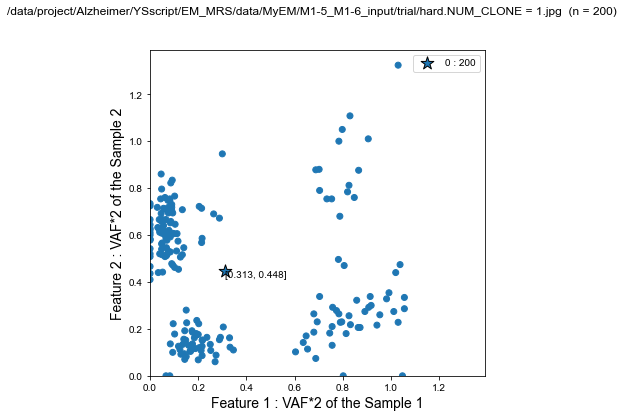

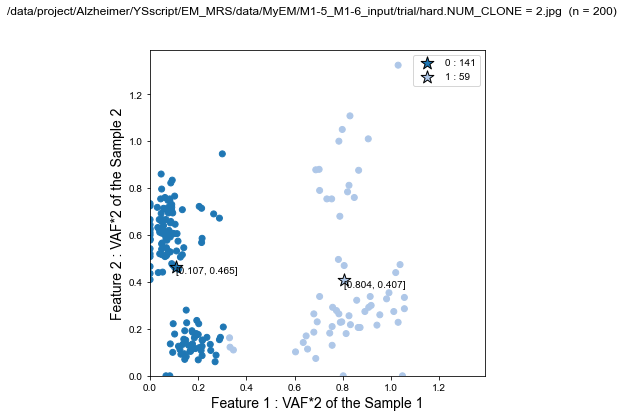

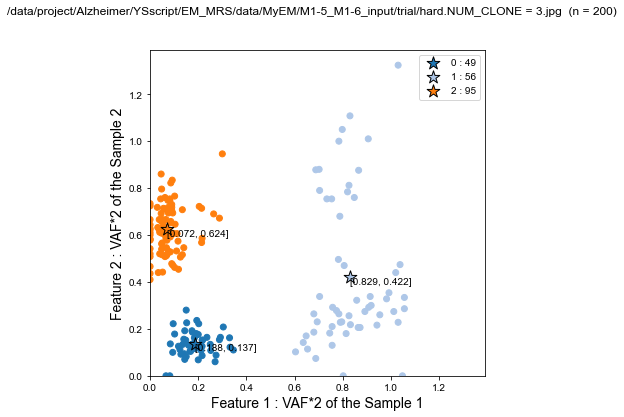

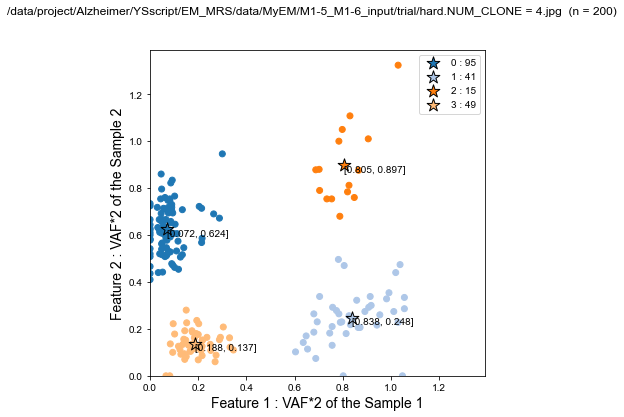

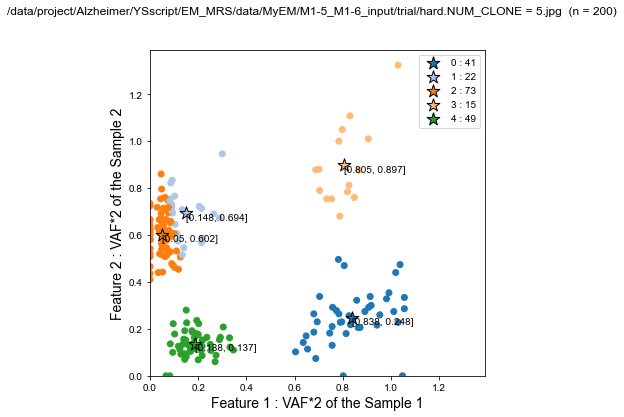

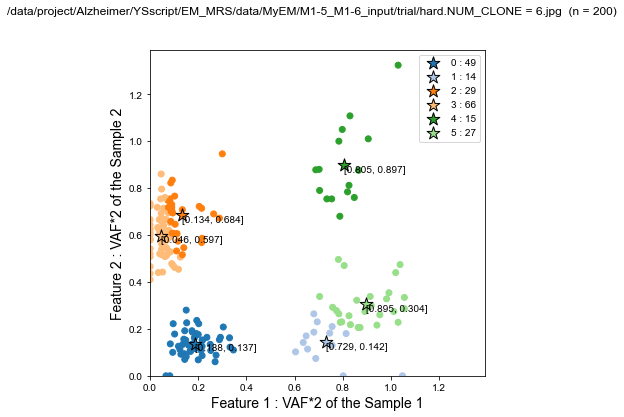

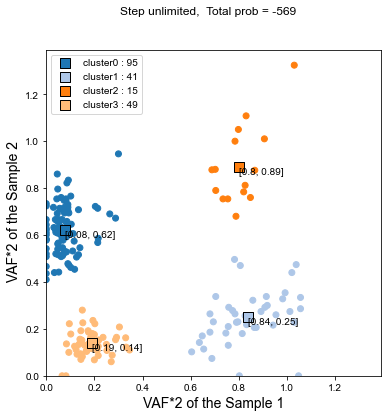

In [184]:
def finalresult(method, df, np_vaf, **kwargs):
    global NUM_BLOCK, RANDOM_PICK, NUM_MUTATION, NUM_CLONE, NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END,  NUM_CLONE_FORCE, TRIAL_NO, VERBOSE, ELBOW_S, GAUSSIAN_SD, MIN_CLUSTER_SIZE
    global maxmaxmax_likelihood, maxmaxmax_membership, maxmaxmax_NUM_CLONE, maxmaxmax_mixture, maxmax_likelihood, maxmax_membership, maxmax_mixture, max_likelihood, max_membership, max_mixture
    global maxmaxmax_membership_record, maxmaxmax_likelihood_record, maxmaxmax_sil_record,  maxmaxmax_membership_p_record, maxmaxmax_mixture_record, includeoutlier
    global previous_No, previous_mixture, previous_membership, previous_likelihood


    print ("x(NUM_CLONE) : {} \t y(log POSTERIOR) : {}".format([i for i in range (NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1)],  maxmaxmax_likelihood_record  ))

    # Hard visualization
    for i in range (NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1):
        samplename_dict = {k:k for k in range(0, i + 1)}        
        includeoutlier_inside = "False"
        # Hard visualization
        if (VERBOSE in ["True", "T"]) | (int(str(VERBOSE)) >= 0):
            if kwargs["NUM_BLOCK"] >= 2:
                visualizationsingle.drawfigure_2d (maxmaxmax_membership_record[i - NUM_CLONE_TRIAL_START], kwargs["MYEM_DIR"]  + "/trial/hard.NUM_CLONE = {}.jpg".format(i), np_vaf, samplename_dict, includeoutlier_inside, "")




    # max, gap, sil, elbow, elbow + Half, force, best  중에서 선택

    if method.split("+")[0] == "max":
        maxmaxmax_NUM_CLONE = np.argmax(maxmaxmax_likelihood_record) + NUM_CLONE_TRIAL_START
        print ("Max_likelihood : {}\nNUM_CLONE : {}개 (outlier제외)".format(np.max(maxmaxmax_likelihood_record), maxmaxmax_NUM_CLONE))

    elif method.split("+")[0] == "gap":
        Input_B = 20
        Gap_list, Std_list, S_list = np.zeros (NUM_CLONE_TRIAL_END + 1, dtype ="float"), np.zeros (NUM_CLONE_TRIAL_END + 1, dtype ="float"), np.zeros (NUM_CLONE_TRIAL_END + 1, dtype ="float")

        for NUM_CLONE in range (NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1):
            print ("NUM_CLONE == {}".format(NUM_CLONE))
            membership = maxmaxmax_membership_record[NUM_CLONE - NUM_CLONE_TRIAL_START]
            mixture = maxmaxmax_mixture_record[NUM_CLONE - NUM_CLONE_TRIAL_START]

            #1. Intra cluster variation (Wk)
            Wk = 0
            for k in range(NUM_MUTATION):
                j = membership [k]
                #Wk = Wk + BetaBinomDist2 (k, j, df, np_vaf, mixture)      # k번째 mutation - j번 cluster centroid와의 유클리드 거리 계산
                Wk = Wk + math.pow (  scipy.spatial.distance.euclidean(np_vaf[k] * 2, mixture[:, j]),  2)   # Sum of square
            Wk = round(math.log10(Wk), 3)
            print ("\tMy Clustering\tWk  : {}" .format(Wk))


            #2. Random generation & ICC (Wkb)
            Wkb_list = []
            for b in range (Input_B):
                reference_uniform = np.random.random_sample(size=(NUM_MUTATION, NUM_BLOCK ))
                kmeans = KMeans(n_clusters=NUM_CLONE, init='k-means++', max_iter=10, random_state=0)  # model 생성
                kmeans.fit(reference_uniform)  # model에 집어넣어줄 dataframe 지정
                Wkb_list.append ( round (math.log10(kmeans.inertia_), 3) )
                #drawfigure (reference_uniform / 2, kmeans.labels_)

            Gap_list [NUM_CLONE] = round ( np.mean(Wkb_list) - Wk, 3)
            Std_list [NUM_CLONE] = round ( np.std (Wkb_list), 3)
            S_list [NUM_CLONE] = round (Std_list[NUM_CLONE] * math.sqrt(1 + Input_B) , 3 )
            
            print ("\tRandom noise (B = {})\t\tmean Wkb = {}\tsdk = {}\tsk = {}\n\tGap = {}\n\tPosterior = {}".format (Input_B, round( np.mean(Wkb_list), 3) , Std_list[NUM_CLONE], S_list[NUM_CLONE]  , Gap_list[NUM_CLONE], maxmaxmax_likelihood_record[NUM_CLONE - NUM_CLONE_TRIAL_START] ))

        print ("Gap list : {}\nS list : {}\n".format(Gap_list [NUM_CLONE_TRIAL_START : NUM_CLONE_TRIAL_END + 1], S_list [NUM_CLONE_TRIAL_START : NUM_CLONE_TRIAL_END + 1] ))
        maxmaxmax_NUM_CLONE  = NUM_CLONE_TRIAL_START
        for NUM_CLONE in range (NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1):
            if Gap_list[NUM_CLONE] >= Gap_list[NUM_CLONE + 1] - S_list [NUM_CLONE +1]:
                maxmaxmax_NUM_CLONE  = NUM_CLONE
                print ("Gap statistics method : optimal NUM_CLONE = {}".format(NUM_CLONE))
                break



    elif method.split("+")[0] in ["sil", "silhouette", "Silhouette"]:
        from sklearn.metrics import silhouette_samples, silhouette_score
        for i in range (NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END + 1):
            includeoutlier = "False"
            if method.split("+")[1] == "outlier":
                if i != len( np.unique(maxmaxmax_membership_record[int(i) - NUM_CLONE_TRIAL_START]) ):
                    includeoutlier = "True"
                    #print ("membership은 0~{}까지 있는데 mixture.shape[1]은 {} 까지 있다".format())

        sil = calculateSi (maxmaxmax_membership_record[i - NUM_CLONE_TRIAL_START], maxmaxmax_mixture_record[i - NUM_CLONE_TRIAL_START], df, np_vaf, includeoutlier)
        sil = round (sil, 2)
        maxmaxmax_sil_record.append (sil)
        print ("\tNUM_CLONE = {}  -> Likelihood : {},  실루엣 계수 : {}  나누면 {}".format(i, maxmaxmax_likelihood_record[i - NUM_CLONE_TRIAL_START], sil,   round(maxmaxmax_likelihood_record[i - NUM_CLONE_TRIAL_START] / sil )  ) )

        elbow_sil = np.array(maxmaxmax_likelihood_record) / np.array(maxmaxmax_sil_record)
        maxmaxmax_NUM_CLONE = np.argmax(elbow_sil) + NUM_CLONE_TRIAL_START
        print ("Max_Sil : {}\nNUM_CLONE : {}개 (outlier제외)".format(np.max(elbow_sil), maxmaxmax_NUM_CLONE))


    elif method.split("+")[0] == "elbow":
        #print("Mixture record : {0}".format(maxmaxmax_mixture_record))
        if NUM_CLONE_TRIAL_START == NUM_CLONE_TRIAL_END:       # 1개밖에 없으면  kneedle이 오류난다
            threshold_x = NUM_CLONE_TRIAL_END
        else:
            threshold_x = EMsoft.Elbow_final(NUM_CLONE_TRIAL_START, NUM_CLONE_TRIAL_END, maxmaxmax_likelihood_record)

        if ADJUSTMENT_GLOBAL in ["Half", "half"]:
            if method.split("+")[1] == "outlier":
                includeoutlier = "True"
            else:
                includeoutlier = "False"
                
            for i in range (threshold_x, NUM_CLONE_TRIAL_END + 1):   # 합쳐서 1 나오는게 없으면 말이 안되니까 
                best_makeone_subset, p_list = isparent.makeone (maxmaxmax_membership_record[i - NUM_CLONE_TRIAL_START], maxmaxmax_mixture_record[i - NUM_CLONE_TRIAL_START], includeoutlier , **kwargs)
                if type(best_makeone_subset) != type(None):
                    #print ("NUM_CLONE = {} 은 그래도 합쳐서 1이 되는게 있으니 여기서 그만하자 ({})".format(i, best_makeone_subset[0]))
                    threshold_x_elbow = i
                    threshold_x_best = np.argmax(maxmaxmax_likelihood_record) + NUM_CLONE_TRIAL_START
                    while True:
                        if threshold_x_best == threshold_x_elbow:
                            threshold_x = threshold_x_elbow
                            break

                        if method.split("+")[1] == "outlier":
                            y = sorted(np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1][:-1], reverse = True)      # outlier 옵션의 경우 맨 마지막 clone 은 counting에서 빼줘야 함
                        else:
                            y = sorted(np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1], reverse = True)      # 개수를 역으로 sorting한 것

                        if threshold_x_best == 2:
                            if (y[-1] < 0.2 * y[0]) | (y[-1] < MIN_CLUSTER_SIZE) :    # 20% 도 안된다면
                                #print ("\t NUM_CLONE = {} .  2개 중 1개가 20%도 안되서 하나 내리자 (list (outlier 제외)= {},  list (포함) = {})".format(threshold_x_best, y, np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                                threshold_x_best = threshold_x_best - 1
                            else:
                                threshold_x = 2
                                #print ("\t NUM_CLONE = {} : 만족    {}  ".format(threshold_x_best, np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                                break
                            
                        elif threshold_x_best > 2:
                            sd_y = scipy.ndimage.standard_deviation(np.array(y))
                            median_y = np.percentile(y[:-1], 50,  interpolation='midpoint')   # median
                            mean_y = np.mean(y[:])

                            #print ("y : {0}\nmedian : {1}\tsd : {2}".format(y, median_y, sd_y))
                            if (y[-1] < np.min([mean_y, median_y]) - 2 * sd_y) | ( y[-1] < MIN_CLUSTER_SIZE ):
                                #print ("\t NUM_CLONE = {} :  매우 적은 membership이 있어서 적절하지 않다. 하나 내리자 (Mean = {},  Median = {}, SD = {}, list (outlier 제외) = {},  list (포함) = {})".format(threshold_x_best, y[-1], round(mean_y), round(median_y), round(sd_y), y,  np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                                threshold_x_best = threshold_x_best - 1
                            else:
                                #print ("\t NUM_CLONE = {} : 만족     (Mean = {},  Median = {}, SD = {}, list (outlier제외) = {}, list (포함) = {})".format(threshold_x_best, round(mean_y), round(median_y), round(sd_y), y, np.unique(maxmaxmax_membership_record[int(threshold_x_best) - NUM_CLONE_TRIAL_START], return_counts = True)[1] ))
                                break
                    
                    print ("Elbow 법으로 구한 clone : {}\t Best 법으로 구한 clone : {}".format (threshold_x_elbow, threshold_x_best))
                    threshold_x = int((threshold_x_elbow + threshold_x_best) / 2)
                    break
                else:
                    print ("NUM_CLONE = {} 은 합쳐서 1이 되는게 하나도 없으니 말도 안된다".format(i))

        maxmaxmax_NUM_CLONE = int(threshold_x)

    elif method.split("+")[0] == "force":
        maxmaxmax_NUM_CLONE = NUM_CLONE_FORCE

    elif method.split("+")[0] == "best":     # max값부터 시작해서 계속 검증해서 내려오자
        while True:
            if maxmaxmax_NUM_CLONE == 1:
                break

            if method.split("+")[1] == "outlier":
                y = sorted(np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1][:-1], reverse = True)      # outlier 옵션의 경우 맨 마지막 clone 은 counting에서 빼줘야 함
            else:
                y = sorted(np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1], reverse = True)      # 개수를 역으로 sorting한 것

            if maxmaxmax_NUM_CLONE == 2:
                if (y[-1] < 0.2 * y[0]):    # 20% 도 안된다면
                    print ("\t NUM_CLONE = {} .  2개 중 1개가 20%도 안되서 하나 내리자 (list (outlier 제외)= {},  list (포함) = {})".format(maxmaxmax_NUM_CLONE, y, np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                    maxmaxmax_NUM_CLONE = maxmaxmax_NUM_CLONE - 1
                elif (y[-1] < MIN_CLUSTER_SIZE):    # 20% 도 안된다면:
                    print ("\t NUM_CLONE = {} .  MIN_CLUSTER_SIZE ({}) 보다도 적어서 적절하지 않다. 하나 내리자 (list (outlier 제외) = {},  list (포함) = {})".format(maxmaxmax_NUM_CLONE, MIN_CLUSTER_SIZE, y, np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                    maxmaxmax_NUM_CLONE = maxmaxmax_NUM_CLONE - 1
                else:
                    print ("\t NUM_CLONE = {} : 만족    {}  ".format(maxmaxmax_NUM_CLONE, np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                    break
                
            elif maxmaxmax_NUM_CLONE > 2:
                sd_y = scipy.ndimage.standard_deviation(np.array(y))
                median_y = np.percentile(y[:-1], 50,  interpolation='midpoint')   # median
                mean_y = np.mean(y[:])

                #print ("y : {0}\nmedian : {1}\tsd : {2}".format(y, median_y, sd_y))
                if (y[-1] < np.min([mean_y, median_y]) - 2 * sd_y) | ( y[-1] < MIN_CLUSTER_SIZE ):
                    print ("\t NUM_CLONE = {} :  매우 적은 membership이 있어서 적절하지 않다. 하나 내리자 (Mean = {},  Median = {}, SD = {}, list (outlier 제외) = {},  list (포함) = {})".format(maxmaxmax_NUM_CLONE, y[-1], round(mean_y), round(median_y), round(sd_y), y,  np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
                    maxmaxmax_NUM_CLONE = maxmaxmax_NUM_CLONE - 1
                else:
                    print ("\t NUM_CLONE = {} : 만족     (Mean = {},  Median = {}, SD = {}, list (outlier제외) = {}, list (포함) = {})".format(maxmaxmax_NUM_CLONE, round(mean_y), round(median_y), round(sd_y), y, np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1] ))
                    break

    
        
    maxmaxmax_likelihood = maxmaxmax_likelihood_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START]
    maxmaxmax_mixture = maxmaxmax_mixture_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START]
    maxmaxmax_membership = maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START]


    # 한번 더 발진 (Fixed sum 1 제한 풀어주기)
    NUM_CLONE = maxmaxmax_NUM_CLONE
    global trial
    trial = "_final"
    print ("Fixed sum 1 제한 풀고 한번 더 갑니다 (NUM_CLONE = {})".format(NUM_CLONE))
    max_likelihood = float("-inf")
    max_membership = np.zeros(NUM_MUTATION, dtype="int32")
    max_mixture = np.zeros((NUM_BLOCK, NUM_CLONE + 1), dtype='float')
    mixture = maxmaxmax_mixture
    adjustment = "False"
    for t in range(1, 30):
        # fixed 1 mixture로 시작해서 다시 mixture 움직이기
        total_prob, membership = Estep(mixture, df)
        mixture, makeone_index = Mstep(membership, df, NUM_CLONE, adjustment, "Hard", t,  total_prob, **kwargs)  
        membership_sort, mixture_sort = Sorting(membership, mixture)
        if GoStop(t, total_prob, membership, mixture, t) == "Stop":
            drawfigure_2d (max_membership, max_mixture, makeone_index, kwargs["MYEM_DIR"] + "/trial/hard.clone." + str (NUM_CLONE) + ".unlimited.jpg" , np_vaf, samplename_dict, "unlimited", total_prob, "False", "")
            break
    


    # "outlier", "normal" 중에서 선택

    includeoutlier = "No"
    if method.split("+")[1] == "outlier":
        if maxmaxmax_NUM_CLONE == len( np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START]) ):  # 원래는 뒤에가 1이 더 커야 함
            maxmaxmax_mixture = maxmaxmax_mixture[: , :-1]   # 맨 뒤에 넣어줬던 outlier mixture가 0, 0 일테니 지워주자
            print ("\nOutlier mode에서 outlier를 찾지 못함 -> \n\tNUM_CLONE = {0} \n\tmixture :{1}\n\tcount : {2}".
                format (maxmaxmax_NUM_CLONE, maxmaxmax_mixture, np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1] )) 
        else:
            print ("\nOutlier mode -> \n\tNUM_CLONE = {0} ( = {1} + 1 ) \n\tmixture : {2}\n\tcount : {3}".
                format(maxmaxmax_NUM_CLONE + 1, maxmaxmax_NUM_CLONE, list(maxmaxmax_mixture), np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1]))
            maxmaxmax_NUM_CLONE = maxmaxmax_NUM_CLONE + 1         # fp cluster가 생기는 것이니까 + 1
            includeoutlier = "Yes"
    else:
        print ("\nNormal mode -> \n\tNUM_CLONE = {0}\nmixture : {1}".format(maxmaxmax_NUM_CLONE, list(maxmaxmax_mixture)))
        print (np.unique(maxmaxmax_membership_record[int(maxmaxmax_NUM_CLONE) - NUM_CLONE_TRIAL_START], return_counts = True)[1])


finalresult(method, df, np_vaf, **kwargs)

elbow+normal 	VERBOSE= 1


FileNotFoundError: [Errno 2] No such file or directory: '/data/project/Alzheimer/YSscript/EM_MRS/data/MyEM/M1-5_M1-6_input/trial/hard.clone.3.trial0.step1.jpg'

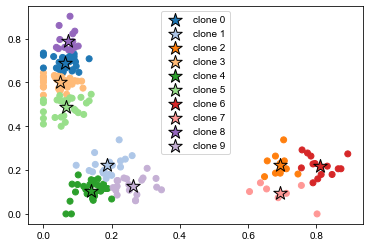

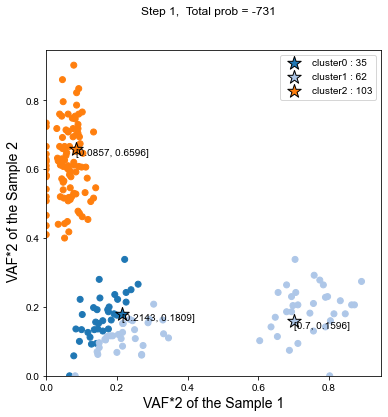

In [155]:
#2-1. EM 돌리기  (원하는 df만 넣어주면 가능)     (elbow,max)+(normal, outlier)    # outlier라면 뭐든지 +1 해서 출력된다
kwargs["ELBOW_S"] = 1; kwargs["GAUSSIAN_SD"] = 2; kwargs["TRIAL_NO"] = 5; kwargs["NUM_CLONE_TRIAL_START"] = 3;  kwargs["NUM_CLONE_TRIAL_END"] = 7; kwargs["NUM_CLONE_TRIAL_FORCE"] = 4; kwargs["MIN_CLUSTER_SIZE"] = 15; kwargs["VERBOSE"] = 1; kwargs["OUTLIER_STANDARD"] = "looser"
method = "elbow+normal"; adjustment = "Half";  kwargs["KMEANS_CLUSTERNO"] = 10
NUM_CLONE_NOADJUST, membership, mixture, includeoutlier_inside = EMhard.main(df, method, adjustment, **kwargs)    

# #2-2. visualizationsingle
# samplename_dict = {i:i for i in range(0,NUM_CLONE)}        
# # Hard visualization
# if kwargs["NUM_BLOCK"] >= 2:
#     visualizationsingle.drawfigure_2d (membership, "NotSave", np_vaf, samplename_dict, includeoutlier_inside, "")
# if kwargs["NUM_BLOCK"] == 1:
#     visualizationsingle.drawfigure_1d (membership, "NotSave", np_vaf, samplename_dict, includeoutlier_inside)



#3-1. 정답set과 점수 맞춰보고 색깔 맞추기  (Hard clustering)

score_df, score = scoring.mixturebased(mixture_answer, mixture, membership_answer, membership, samplename_dict_input, samplename_dict_input_rev, includeoutlier_inside, **kwargs)
print ("\nscore : {}점 / {}점".format(score, kwargs["RANDOM_PICK"]))

#3-2. visualizationpair
if kwargs["NUM_BLOCK"] >= 2:
    visualizationpair.drawfigure_2d (membership_answer, mixture_answer, membership, np.round(mixture, 2), score_df, kwargs["MYEM_DIR"] + "/2.hard.jpg",  "ANSWER : MRS", "MY ALGORITHM ", np_vaf, includeoutlier_inside,  dimensionreduction="None")

### 3. Child clone - Parent clone으로 나뉘어지는지 확인하기

In [3]:
ISPARENT, CANDIDATE_CHILD_index, CANDIDATE_CHILD_mixture, CANDIDATE_parent_index = isparent.main(membership, mixture, includeoutlier_inside, **kwargs)


print ("\n가장 그럴듯한 CHILD 조합 ({}) : sum = {}".format(CANDIDATE_CHILD_index, CANDIDATE_CHILD_mixture))
if ISPARENT == True:
    print ("{}번째 clone ( {} )이 2개 이상의 child보다 크기에 parent 가능성이 있다".format(CANDIDATE_parent_index, mixture[:, CANDIDATE_parent_index]) )
else:
    print ("Parent clone은 없어 보인다")


가장 그럴듯한 CHILD 조합 ([1, 2, 3]) : sum = [0.98, 1.05]
0번째 clone ( [0.8  0.87] )이 2개 이상의 child보다 크기에 parent 가능성이 있다


### 4. Soft clustering   (Parent 유무에 따라 outlier 조건을 빡세게 혹은 느슨하게 잡는다)

elbow+outlier
x(NUM_CLONE) : [2, 3, 4, 5, 6] 	 y(POSTERIOR) : [-1012.27, -706.45, -724.17, -774.85, -911.43]
clone 0의 평균 silhouette score : 0.506916457863224
clone 1의 평균 silhouette score : 0.3817370936055458
clone 2의 평균 silhouette score : 0.46376187264499796
	NUM_CLONE = 2  -> Likelihood : -1012.27,  실루엣 계수 : 0.46 나누면 -2201
clone 0의 평균 silhouette score : 0.5728328836146105
clone 1의 평균 silhouette score : 0.49539440900665704
clone 2의 평균 silhouette score : 0.5890181587855456
clone 3의 평균 silhouette score : 0.7295985426665909
	NUM_CLONE = 3  -> Likelihood : -706.45,  실루엣 계수 : 0.73 나누면 -968
clone 0의 평균 silhouette score : 0.6904792425512579
clone 1의 평균 silhouette score : 0.6475888195193138
clone 2의 평균 silhouette score : 0.6673662686377091
clone 3의 평균 silhouette score : 0.6098973182621804
clone 4의 평균 silhouette score : 0.750127607384986
	NUM_CLONE = 4  -> Likelihood : -724.17,  실루엣 계수 : 0.75 나누면 -966
clone 0의 평균 silhouette score : 0.6181801446657655
clone 1의 평균 silhouette score : 0.66098609363

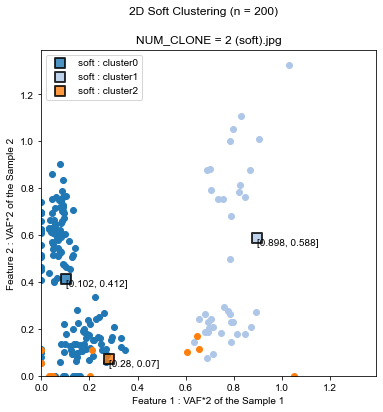

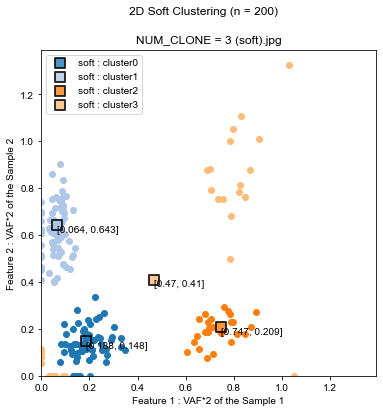

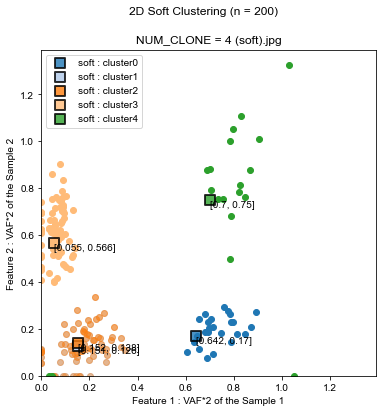

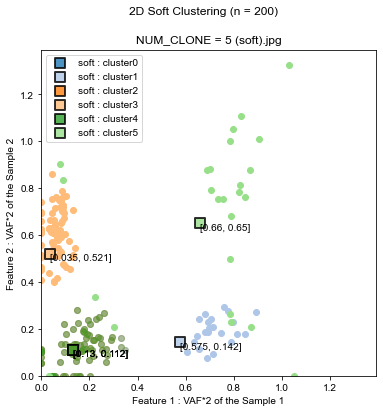

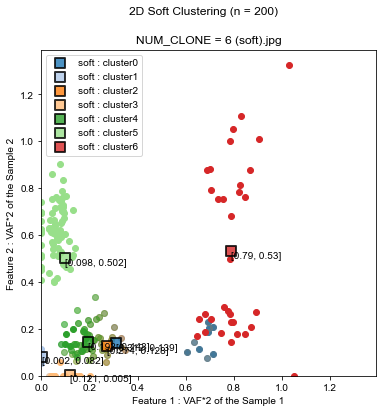

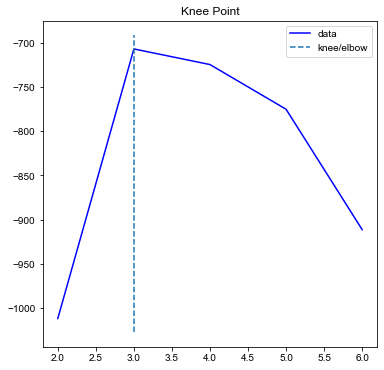


Outlier mode -> 
	NUM_CLONE = 4 ( = 3 + 1 ) 
	mixture : [array([0.1884, 0.0644, 0.7472, 0.47  ]), array([0.148 , 0.6434, 0.2086, 0.41  ])]
	count : [60 81 25 34]


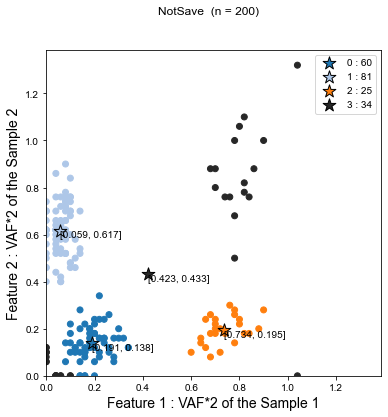

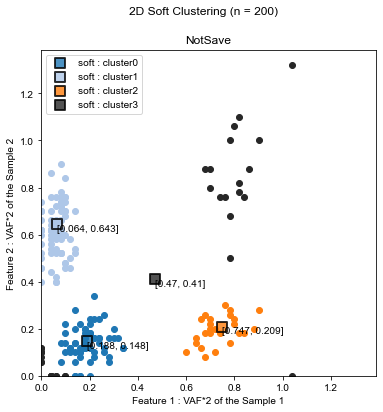

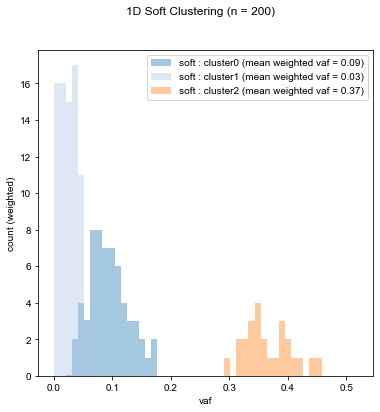

In [4]:
#2-1. EM 돌리기  (원하는 df만 넣어주면 가능)     (elbow,max,force)+(normal, outlier)    # includeoutlier == Yes라면 +1 해서 출력된다
kwargs["TRIAL_NO"] = 10; kwargs["NUM_CLONE_TRIAL_START"] = 2;  kwargs["NUM_CLONE_TRIAL_END"] = 6; kwargs["NUM_CLONE_FORCE"] = 1; kwargs["MIN_CLUSTER_SIZE"] = int(NUM_MUTATION / 50); kwargs["VERBOSE"] = 1; 
method = "elbow+outlier"; adjustment = "True"
if ISPARENT == True:       # Outlier를  매우 많이 생성되게 유도한다
    kwargs["ISPARENT"] = True; kwargs["ELBOW_S"] = 3; kwargs["GAUSSIAN_SD"] = 0.9; kwargs["OUTLIER_STANDARD"] = "stricter"
else:       # Outlier를 매우 적게 생성되게 유도한다
    kwargs["ISPARENT"] = False;  kwargs["ELBOW_S"] = 1; kwargs["GAUSSIAN_SD"] = 1.5; kwargs["OUTLIER_STANDARD"] = "looser"
    
NUM_CLONE, membership, membership_p, membership_p_normalize, mixture, includeoutlier_inside = EMsoft.main(df, method, adjustment, **kwargs)   
membership_p_normalize_new = membership_p_normalize


#2-2. visualizationsingle
samplename_dict = {i:i for i in range(0,NUM_CLONE)}         # index_no :  clone_no = color_no   (clone 번호와 color 번호는 일치시킨다)
## Hard visualization
if kwargs["NUM_BLOCK"] >= 2:
    visualizationsingle.drawfigure_2d (membership, "NotSave", np_vaf, samplename_dict, includeoutlier_inside, "")
if kwargs["NUM_BLOCK"] == 1:
    visualizationsingle.drawfigure_1d (membership, "NotSave", np_vaf, samplename_dict, includeoutlier_inside)


## Soft visualization
if kwargs["NUM_BLOCK"] >= 2:
    visualizationsinglesoft.drawfigure_2d (membership, np.round(mixture, 3), membership_p_normalize,"NotSave" , np_vaf, samplename_dict, includeoutlier_inside, "")
if kwargs["NUM_BLOCK"] >= 1:
    visualizationsinglesoft.drawfigure_1d (membership, np.round(mixture, 3), membership_p_normalize, "NotSave", np_vaf, samplename_dict, includeoutlier_inside)

### 5. Outlier 뽑고, Inside / Outside outlier로 구분하기

In [11]:
# 5. Outlier 뽑기 (Insdie, Outside구분)         # hard membership을 바탕으로 분류해도 충분하다
Outlier_method = "ML"  # "Distance"
OUTLIER_NO = NUM_CLONE - 1

if Outlier_method in ["ML", "ml"]:
    try :
        boundary_mixture = boundaryclone.main(mixture[:,:-1])    # 맨 마지막 outlier group은 빼고 돌려야지
        df_inside, df_inside_index, np_vaf_inside, df_outside, df_outside_index, np_vaf_outside = \
            extract.classifier_lightgbm (df, np_vaf, membership, boundary_mixture, OUTLIER_NO)
    except:
        df_inside, df_inside_index, np_vaf_inside, df_outside, df_outside_index, np_vaf_outside = \
            extract.classifier_distance (df, np_vaf, membership, mixture [:,:-1], OUTLIER_NO)       

elif Outlier_method in ["Distance", "distance"]:
    df_inside, df_inside_index, np_vaf_inside, df_outside, df_outside_index, np_vaf_outside = \
        extract.classifier_distance (df, np_vaf, membership, mixture [:,:-1], OUTLIER_NO)   
        # 맨 마지막 outlier group은 거리계산에서 뺴줘야지



#################################################################################################################################################
if ISPARENT == False:   # 더 돌릴 것도 없이 다 outlier 처리한다
    membership_total = [i for i in membership]   # 얕은 사본을 만들어주고
    for i in df_outside_index:
        membership_total[i] = OUTLIER_NO
    mixture_total = mixture.copy()

    if includeoutlier_inside == "Yes":
        includeoutlier_total = "Yes"
    else:
        includeoutlier_total = "No"

    if includeoutlier_total == "Yes":             # 맨 끝 column에 outlier mixture를 재정비해주기 (M step)
        for i in range (kwargs["NUM_BLOCK"]):
            sum_depth, sum_alt = 0, 0
            for k in range(kwargs["RANDOM_PICK"]):
                if membership_total[k] == np.max(membership_total):    # outlier 찾기
                    sum_depth = sum_depth + df[k][i]["depth"]
                    sum_alt = sum_alt + df[k][i]["alt"]
            mixture_total[i][-1] = round((sum_alt * 2) / sum_depth, 2)


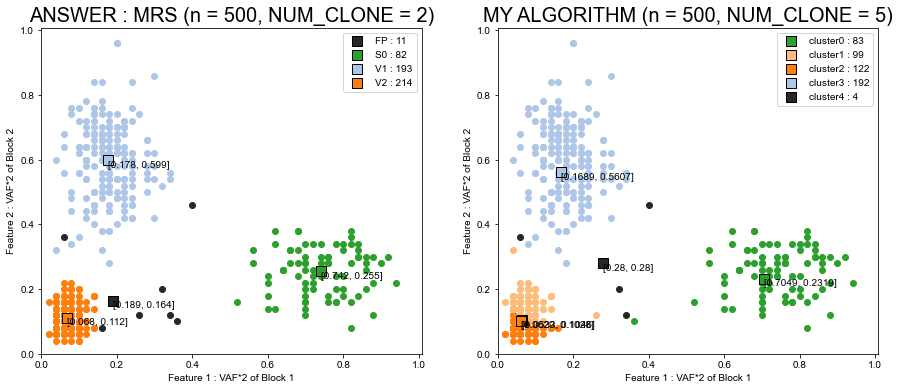

In [12]:
if ISPARENT == True:
    ############### INSIDE OUTLIER ##########################################################
    membership_inside = [0] * len(df_inside)
    mixture_inside  = EMhard.Mstep (membership_inside, df_inside, 1, kwargs["NUM_BLOCK"], len(df_inside), "False", "")    # inside outlier 의 mixture를 구해주기
    membership_inside = [OUTLIER_NO for i in membership_inside ]            # 번호를 뒤로 밀어 준다


    ############### OUTSIDE OUTIER :  df_outside 들끼리만 EM 돌리기   (hard clustering을 돌려도 될 듯) ############
    kwargs["NUM_CLONE_TRIAL_START"] = 1; kwargs["NUM_CLONE_TRIAL_END"] = 4;  kwargs["NUM_CLONE_FORCE"] = 1;  kwargs["MIN_CLUSTER_SIZE"] = 0;  kwargs["ELBOW_S"] = 0.99; kwargs["GAUSSIAN_SD"] = 1.5; kwargs["VERBOSE"] = 0
    if len(df_outside) < kwargs["NUM_CLONE_TRIAL_END"]:
        kwargs["NUM_CLONE_TRIAL_END"] = len(df_outside)

    if len(df_outside) == 0:       # 아예 outlier가 하나도 발견 안 됐을 경우
        includeoutlier_outside  = "No"
        membership_outside = []

    else:
        method = "elbow+outlier"; adjustment = "False"
        NUM_CLONE_outside, membership_outside, mixture_outside, includeoutlier_outside = EMhard.main(df_outside, method, adjustment, **kwargs)
        membership_outside = [i + OUTLIER_NO for i in membership_outside ]            # 번호를 뒤로 밀어 준다
        #includeoutlier_outside = "Yes"

        if includeoutlier_outside == "Yes":
            OUTLIER_OUTLIER_NO = np.max (membership_outside)
            membership_inside = [OUTLIER_OUTLIER_NO for i in membership_inside ]            # 번호를 맨 뒤로 한번 더 밀어 준다   (outlier 끼리는 색깔을 통일하려고)
            print ("previous membership : {} + {} \nmembership_inside : {} -> {} \n:membership_outside : {} + {}"\
            .format(set(membership) - set([OUTLIER_NO]), OUTLIER_NO, OUTLIER_NO, OUTLIER_OUTLIER_NO, set(membership_outside) - set([OUTLIER_OUTLIER_NO]), OUTLIER_OUTLIER_NO))
        else:
            OUTLIER_OUTLIER_NO = np.max (membership_outside) + 1
            membership_inside = [OUTLIER_OUTLIER_NO for i in membership_inside ]            # 번호를 맨 뒤로 한번 더 밀어 준다   
            print ("previous membership : {} + {} \nmembership_inside : {} -> {} \n:membership_outside : {}"\
            .format(set(membership) - set([OUTLIER_NO]), OUTLIER_NO, OUTLIER_NO, OUTLIER_OUTLIER_NO, set(membership_outside) ))


        #5-2. visualizationsingle
        samplename_dict = {i:i  for i in range(OUTLIER_NO , OUTLIER_OUTLIER_NO + 1)}
        visualizationsingle.drawfigure_2d (membership_outside, "NotSave", np_vaf_outside, samplename_dict, includeoutlier_outside, "")
        #visualizationsingle.drawfigure_1d (membership_outside, "NotSave", np_vaf_outside, samplename_dict, includeoutlier_outside)


    # 6. Total 한번에 그림그리기
    if (includeoutlier_inside == "Yes") | (includeoutlier_outside == "Yes"):
        includeoutlier_total = "Yes"
    else:
        includeoutlier_total = "No"

    membership_total = [i for i in membership]   # 얕은 사본을 만들어주고
    for i, index in enumerate(df_inside_index):
        membership_total[index] = membership_inside[i]    
    for i, index in enumerate(df_outside_index):
        membership_total[index] = membership_outside[i]


    # Mixture total 만들기
    if includeoutlier_inside == "Yes":
        if len(df_outside) > 0:     # 아예 outlier가 없으면
            mixture_total = np.concatenate (((mixture[: , : -1]), (mixture_outside)), axis = 1)
            if includeoutlier_outside == "No":     # 맨 마지막에 insideoutlier 를 넣어줘야 하니까
                    mixture_total = np.concatenate ( (mixture_total, np.zeros((kwargs["NUM_BLOCK"], 1), dtype = "float")) , axis = 1)
        else:    # outlier_outside가 하나도 없을 경우
            mixture_total = mixture

    if includeoutlier_total == "Yes":             # 맨 끝 column에 outlier mixture를 재정비해주기 (M step)
        for i in range (kwargs["NUM_BLOCK"]):
            sum_depth, sum_alt = 0, 0
            for k in range(kwargs["RANDOM_PICK"]):
                if membership_total[k] == np.max(membership_total):    # outlier 찾기
                    sum_depth = sum_depth + df[k][i]["depth"]
                    sum_alt = sum_alt + df[k][i]["alt"]
            mixture_total[i][-1] = round((sum_alt * 2) / sum_depth, 2)

        print ("child clone : {}\ninside outlier : {}\nparent clone : {}\noutside outlier : {}\n\ntotal mixture : \n{}\n".format(set(membership) -  set(membership_inside), set(membership_inside), set(membership_outside)  - set ( [np.max(membership_total)] ) , set([np.max(membership_total)]),  mixture_total))


# 채점하고 색깔 다시 맞춰서 그리기
score_df, score = scoring.mixturebased(mixture_answer, mixture_total, membership_answer, membership_total, samplename_dict_input, samplename_dict_input_rev, includeoutlier_total)
visualizationpair.drawfigure_2d (membership_answer, mixture_answer, membership_total, mixture_total, score_df, kwargs["MYEM_DIR"]  + "/4.total.jpg" , "ANSWER : MRS", "MY ALGORITHM", np_vaf, includeoutlier_total,  dimensionreduction="None")

In [15]:
score_df

answer myanswer  num  distance  n(answer)  n(myanswer)
0     FP        4    4  0.147435         11            4
1     V1        3  192  0.039366        193          192
2     V2        2  117  0.010519        214          122
3     V2        1   97  0.000000        214           99
4     S0        0   82  0.043704         82           83

In [34]:
Y_index = result.Yindex(score_df, 5)
print ("Score : {}개 / {}개\nY-index : {}\n\n".format( score, kwargs["RANDOM_PICK"], Y_index))
print ("============FP ANALYSIS==========")
answeronly, intersection, myonly, sensitivity, PPV, F1 = result.FPmatrix(score_df)
print ("answer FP {}개 중에 {}개 일치함".format( answeronly + intersection ,  intersection ) )
print ("\tanswerFP only : {}\n\tintersection : {}\n\tmyFP only : {}".format( answeronly, intersection, myonly ))
print ("==============================")

with open (kwargs["MYEM_DIR"] + "/results.txt", "w", encoding = "utf8") as output_myEM:
    print ("{}/{}\n{}\n{}\n{}\n{}\n{}\n{}\n{}".format(score, kwargs["RANDOM_PICK"], Y_index, answeronly, intersection, myonly, sensitivity, PPV, F1 ), file = output_myEM)
    print (score_df, file = output_myEM)
    print ("Phylogeny\n", file = output_myEM)

Score : 427개 / 500개
Y-index : 0.067


============FP ANALYSIS==========

Sensitivity : 0.64
PPV : 0.53
F1 : 0.58
answer FP 14개 중에 9개 일치함
	answerFP only : 5
	intersection : 9
	myFP only : 8


### Phylogeny 

In [28]:
# 7. phylogeny 관계를 유추한다
if ISPARENT == True:
    g = phylogeny.main(membership, membership_outside, mixture_total, includeoutlier_outside, **kwargs)

outside No = 8, outside_mixture = [0.135  0.7447], sum_mixture = [0.1681, 0.6663], subset_list = [1, 2],  p = -2.3279328286830685
outside No = 5, outside_mixture = [0.062  0.7353], sum_mixture = [0.1628, 0.6447], subset_list = [1, 3],  p = -2.710384655924444
outside No = 7, outside_mixture = [0.9684 0.1085], sum_mixture = [0.7439, 0.1674], subset_list = [0, 4],  p = -2.874869626275866
outside No = 6, outside_mixture = [0.    0.757], sum_mixture = [0.1439, 0.5667], subset_list = [1, 4],  p = -4.069933557404667

8→1
8→2

5→1
5→3

7→0
7→4

6→1
6→4



--------------------------------------------------------------------
## Pyclone

In [20]:
COMMAND = " ".join( ["PyClone run_analysis_pipeline --in_files"] + [kwargs["PYCLONE_DIR"] + "/block{0}.tsv".format(i) for i in range(kwargs["NUM_BLOCK"])] + \
["--samples \"block0\" \"block1\" --working_dir ", kwargs["PYCLONE_DIR"], " --tumour_contents 1.0 1.0  --num_iters 1000  --min_cluster_size 10 --max_clusters 7"] )

logPath = "/data/project/Alzheimer/YSscript/EM_MRS/log"

#os.system("qsub -pe smp 2 -e " + logPath + " -o " + logPath + " -N py_" + SAMPLENAME +   " pyclone_pipe.sh " + COMMAND)
#os.system("bash pyclone_pipe.sh " + COMMAND)

# import subprocess
# subprocess.run (["bash pyclone_pipe.sh"], shell = True)

print( COMMAND )

PyClone run_analysis_pipeline --in_files /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone/M1-3_M1-8_input/block0.tsv /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone/M1-3_M1-8_input/block1.tsv --samples "block0" "block1" --working_dir  /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone/M1-3_M1-8_input  --tumour_contents 1.0 1.0  --num_iters 1000 --max_clusters 7 --min_cluster_size 10


In [11]:
INPUT_NPVAF = kwargs["NPVAF_DIR"] + ".npvaf"
INPUT_FILENAME = kwargs["PYCLONE_DIR"] + "/tables/loci.tsv"
OUTPUT_FILENAME = kwargs["PYCLONE_DIR"]  + "/4.total.jpg" 

score_df_pyclone, score_pyclone, membership_pyclone, mixture_pyclone = \
    pyclonesim.main(INPUT_NPVAF, INPUT_FILENAME, OUTPUT_FILENAME, mixture_answer, membership_answer, samplename_dict_input, samplename_dict_input_rev)

visualizationpair.drawfigure_2d (membership_answer, mixture_answer, membership_pyclone, mixture_pyclone, score_df_pyclone, OUTPUT_FILENAME,  "ANSWER : MRS", "PyClone", np_vaf, "No",  dimensionreduction="None")

Y_index_pyclone = result.Yindex(score_df_pyclone, 5)
print ("PyClone : {}개 / {}개\nY-index : {}\n\n".format( score_pyclone, kwargs["RANDOM_PICK"], Y_index_pyclone))
print ("[FP ANALYSIS]")
answeronly_pyclone, intersection_pyclone, myonly_pyclone, sensitivity_pyclone, PPV_pyclone, F1_pyclone = result.FPmatrix(score_df_pyclone)
print ("==============================")



with open (kwargs["PYCLONE_DIR"]  + "/results.txt", "w", encoding = "utf8") as output_pyclone:
    print ("{}/{}\n{}\n{}\n{}\n{}\n{}\n{}\n{}".format(score_pyclone, kwargs["RANDOM_PICK"], Y_index_pyclone, answeronly_pyclone, intersection_pyclone, myonly_pyclone, sensitivity_pyclone, PPV_pyclone, F1_pyclone ), file = output_pyclone)
    print (score_df_pyclone, file = output_pyclone)

    


----------
## PYCLONE-VI

In [6]:
PYCLONEVI_START_TIME = datetime.datetime.now()

INPUT_TSV=kwargs["PYCLONEVI_DIR"] + "/input.tsv"
OUTPUT_H5=kwargs["PYCLONEVI_DIR"]  + "/output.h5"
OUTPUT_TSV=kwargs["PYCLONEVI_DIR"]  + "/output.tsv"

logPath = "/data/project/Alzheimer/YSscript/EM_MRS/log"
# os.system("qsub -pe smp 2 -e " + logPath + " -o " + logPath + " -N pyvi" + SAMPLENAME +   " pyclonevi_pipe.sh " + INPUT_TSV + " " + OUTPUT_H5 + " " + OUTPUT_TSV )

subprocess.run (["bash pyclonevi_pipe.sh " + INPUT_TSV + " " + OUTPUT_H5 + " " + OUTPUT_TSV], shell = True)


Samples: block0 block1
Num mutations: 500
Performing restart 0
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -38305.44845927261
Number of clusters used: 10

Fitting completed
ELBO: -3787.210669084471
Number of clusters used: 5

Performing restart 1
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -43121.90687639267
Number of clusters used: 10

Fitting completed
ELBO: -3783.607037958554
Number of clusters used: 5

Performing restart 2
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -20591.180016905677
Number of clusters used: 10

Fitting completed
ELBO: -3688.7228048937236
Number of clusters used: 8

Performing restart 3
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -22166.749314633213
Number of clusters used: 10

Fitting completed
ELBO: -3727.8877642311486
Number of clusters used: 7

Performing restart 4
Setting annealing factor to : 1.0

Iteration: 0
ELBO: -35776.76006336379
Number of clusters used: 10

Fitting completed
ELBO: -3710.6843274398857
Number of 

CompletedProcess(args=['bash pyclonevi_pipe.sh /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone-vi/M1-3_M1-8_input/input.tsv /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone-vi/M1-3_M1-8_input/output.h5 /data/project/Alzheimer/YSscript/EM_MRS/data/pyclone-vi/M1-3_M1-8_input/output.tsv'], returncode=0)


[RESULTS]
pyclone_vi : 464 개 / 500개
Y-index : 0.012
[array([0.39, 0.15, 0.87, 0.09, 1.24, 0.41, 0.48, 0.56]), array([0.29, 0.09, 0.34, 0.61, 1.2 , 0.97, 0.12, 0.75])]


현재 시각 : 15h:5m:15s     (걸린 시간 : 0:00:27.643084)


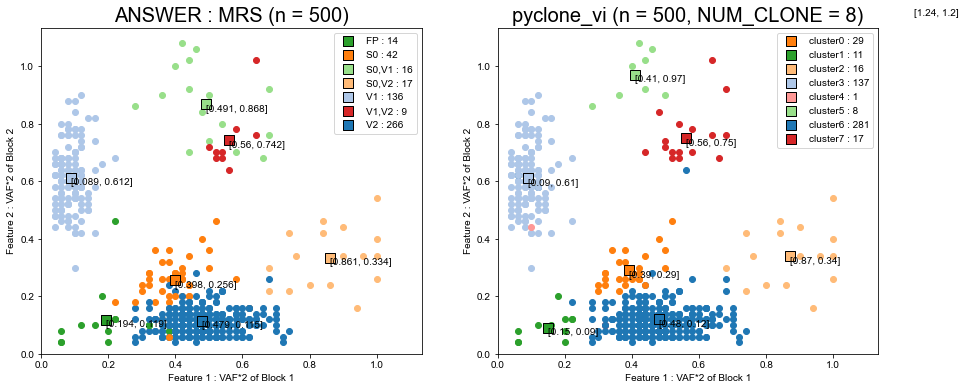

In [7]:
INPUT_PYCLONEVI_RESULT = OUTPUT_TSV
INPUT_NPVAF = kwargs["NPVAF_DIR"] + ".npvaf"
OUTPUT_FILENAME = kwargs["PYCLONEVI_DIR"]  + "/4.total.jpg"  

score_df_pyclonevi, score_pyclonevi, membership_pyclonevi, mixture_pyclonevi = \
    pyclonevisim.main(INPUT_PYCLONEVI_RESULT,  INPUT_NPVAF, OUTPUT_FILENAME, mixture_answer, membership_answer, samplename_dict_input, samplename_dict_input_rev)

visualizationpair.drawfigure_2d (membership_answer, mixture_answer, membership_pyclonevi, mixture_pyclonevi, score_df_pyclonevi, OUTPUT_FILENAME,  "ANSWER : MRS", "pyclone_vi", np_vaf, "No",  dimensionreduction="None")


Y_index_pyclonevi = result.Yindex(score_df_pyclonevi)
print ("\n[RESULTS]\npyclone_vi : {0} 개 / {1}개\nY-index : {2}\n{3}\n".format(score_pyclonevi, kwargs["RANDOM_PICK"], Y_index_pyclonevi, list(mixture_pyclonevi)))

if (kwargs["FP_RATIO"] != 0) | (kwargs["FP"] == "True"):
    print ("[FP ANALYSIS]")
    answeronly_pyclonevi, intersection_pyclonevi, pyclonevi_only, sensitivity_pyclonevi, PPV_pyclonevi, F1_pyclonevi = result.FPmatrix(score_df_pyclonevi)
    print ("answer FP {}개 중에 {}개 일치함".format( answeronly_pyclonevi + intersection_pyclonevi ,  intersection_pyclonevi ) )
    print ("\tanswerFP only : {}\n\tintersection : {}\n\tmyFP only : {}".format( answeronly_pyclonevi, intersection_pyclonevi, pyclonevi_only ))
else:
    answeronly_pyclonevi, intersection_pyclonevi, pyclonevi_only, sensitivity_pyclonevi, PPV_pyclonevi, F1_pyclonevi = 0, 0, 0, None, None, None


with open (kwargs["PYCLONEVI_DIR"]  + "/results.txt", "w", encoding = "utf8") as output_pyclonevi:
    print ("{}\n{}\n{}\n{}/{}\n{}\n{}\n{}\n{}\n{}\n{}\n{}".format(mixture_pyclonevi.shape[1], mixture_pyclonevi, membership_pyclonevi, score_pyclonevi, kwargs["RANDOM_PICK"], Y_index_pyclonevi, answeronly_pyclonevi, intersection_pyclonevi, pyclonevi_only, sensitivity_pyclonevi, PPV_pyclonevi, F1_pyclonevi ), file = output_pyclonevi)
    print (score_df_pyclonevi, file = output_pyclonevi)


print ("\n현재 시각 : {}h:{}m:{}s     (걸린 시간 : {})".format(time.localtime().tm_hour, time.localtime().tm_min, round(time.localtime().tm_sec), datetime.datetime.now() - PYCLONEVI_START_TIME ))

In [9]:
kwargs["FP"] 

'True'

-----------------------------------------------------------------------------------------------------------------------------------------------
## SCICLONE

In [5]:
SCICLONE_START_TIME = datetime.datetime.now()
INPUT_First=kwargs["SCICLONE_DIR"] + "/block0.dat"
INPUT_Second=kwargs["SCICLONE_DIR"] + "/block1.dat"

logPath = "/data/project/Alzheimer/YSscript/EM_MRS/log"

os.system("qsub -pe smp 2 -e " + logPath + " -o " + logPath + " -N sci" + SAMPLENAME +   " sciclone_pipe.sh " + INPUT_First + " " + INPUT_Second + " " + kwargs["SCICLONE_DIR"])
#subprocess.run (["bash sciclone_pipe.sh " + INPUT_First + " " + INPUT_Second + " " + kwargs["SCICLONE_DIR"]], shell = True)


sciclone_pipe.sh: line 12: 224612 Killed                  Rscript /data/project/Alzheimer/YSscript/EM_MRS/sciclone_run.R ${INPUT_First} ${INPUT_Second} $OUTPUT_DIR &>$OUTPUT_DIR"/log"


CompletedProcess(args=['bash sciclone_pipe.sh /data/project/Alzheimer/YSscript/EM_MRS/data/sciclone/M1-3_M1-8_input/block0.dat /data/project/Alzheimer/YSscript/EM_MRS/data/sciclone/M1-3_M1-8_input/block1.dat /data/project/Alzheimer/YSscript/EM_MRS/data/sciclone/M1-3_M1-8_input'], returncode=137)


[RESULTS]
Sciclone : 402 개 / 500개
Y-index : 0.121
[array([0.17, 0.47]), array([0.64, 0.14])]


현재 시각 : 14h:8m:46s     (걸린 시간 : 0:01:29.484246)


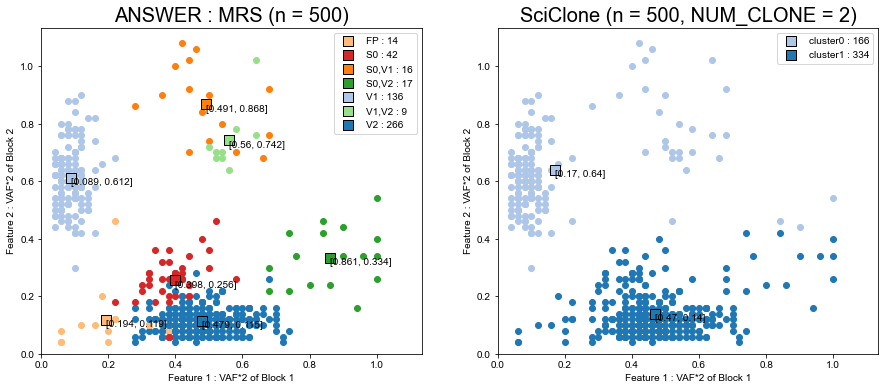

In [6]:
INPUT_SCICLONE_RESULT = kwargs["SCICLONE_DIR"]+ "/results.tsv"
INPUT_NPVAF = kwargs["NPVAF_DIR"] + ".npvaf"
OUTPUT_FILENAME = kwargs["SCICLONE_DIR"]  + "/4.total.jpg"  

score_df_sciclone, score_sciclone, membership_sciclone, mixture_sciclone = \
    sciclonesim.main(INPUT_SCICLONE_RESULT,  INPUT_NPVAF, OUTPUT_FILENAME, mixture_answer, membership_answer, samplename_dict_input, samplename_dict_input_rev)

visualizationpair.drawfigure_2d (membership_answer, mixture_answer, membership_sciclone, mixture_sciclone, score_df_sciclone, OUTPUT_FILENAME,  "ANSWER : MRS", "SciClone", np_vaf, "No",  dimensionreduction="None")


Y_index_sciclone = result.Yindex(score_df_sciclone)
print ("\n[RESULTS]\nSciclone : {0} 개 / {1}개\nY-index : {2}\n{3}\n".format(score_sciclone, kwargs["RANDOM_PICK"], Y_index_sciclone, list(mixture_sciclone)))

if (kwargs["FP_RATIO"] != 0) | (kwargs["FP"] == "True"):
    print ("[FP ANALYSIS]")
    answeronly_sciclone, intersection_sciclone, sciclone_only, sensitivity_sciclone, PPV_sciclone, F1_sciclone = result.FPmatrix(score_df_sciclone)
    print ("answer FP {}개 중에 {}개 일치함".format( answeronly_sciclone + intersection_sciclone ,  intersection_sciclone ) )
    print ("\tanswerFP only : {}\n\tintersection : {}\n\tmyFP only : {}".format( answeronly_sciclone, intersection_sciclone, sciclone_only ))
else:
    answeronly_sciclone, intersection_sciclone, sciclone_only, sensitivity_sciclone, PPV_sciclone, F1_sciclone = 0, 0, 0, None, None, None


with open (kwargs["SCICLONE_DIR"]  + "/results.txt", "w", encoding = "utf8") as output_sciclone:
    print ("{}\n{}\n{}\n{}/{}\n{}\n{}\n{}\n{}\n{}\n{}\n{}".format(mixture_sciclone.shape[1], mixture_sciclone, membership_sciclone, score_sciclone, kwargs["RANDOM_PICK"], Y_index_sciclone, answeronly_sciclone, intersection_sciclone, sciclone_only, sensitivity_sciclone, PPV_sciclone, F1_sciclone ), file = output_sciclone)
    print (score_df_sciclone, file = output_sciclone)


print ("\n현재 시각 : {}h:{}m:{}s     (걸린 시간 : {})".format(time.localtime().tm_hour, time.localtime().tm_min, round(time.localtime().tm_sec), datetime.datetime.now() - SCICLONE_START_TIME ))

In [19]:
score_df_sciclone

NameError: name 'score_df_sciclone' is not defined